># <center> PUBLIC TRANSPORTATION TRANSACTION </center>
>##  **<center>== TRANSJAKARTA == </center>**

# Latar Belakang
Transjakarta adalah moda transportasi berbasis Bus Rapid Transit (BRT) dan non-BRT yang sudah beroperasi sejak tahun 2004 di Jakarta. Tidak hanya melayani perjalanan di dalam Kota Jakarta bahkan hingga ke wilayah megapolitan Bodetabek (Bogor, Depok, Tangerang, dan Bekasi). Transjakarta memiliki Visi `Connecting the Life of Jakarta` Menghubungkan Kehidupan Jakarta dan Misi `Togetether we provide integrated transportation services to ease and bring happiness in the life of Jakarta` Bersama-sama menyediakan layanan transportasi terintegrasi yang memudahkan dan membahagiakan kehidupan Jakarta.

Dalam mencapai visi dan misi yang telah ditetapkan, peran seorang *Data Analyst* menjadi krusial dalam memberikan dukungan konkret kepada visi dan misi yang diusung oleh Transjakarta. Melalui analisis data yang mendalam, seorang *Data Analyst* dapat memberikan kontribusi yang signifikan untuk meningkatkan kualitas layanan yang sesuai dengan prinsip-prinsip inti perusahaan. Dengan fokus pada menyediakan layanan transportasi yang terintegrasi, kami berupaya mempersembahkan kemudahan dan kegembiraan kepada warga Jakarta, sambil menjembatani dan menghubungkan kehidupan kota yang dinamis ini.

## Pernyataan Masalah

Transjakarta dihadapkan pada pertumbuhan yang cepat dalam jumlah pengguna dan kompleksitas jaringan rute. Memahami karakteristik serta perilaku pengguna menjadi sangat penting dalam mengevaluasi dan meningkatkan standar layanan. Dalam konteks ini, diperlukan analisis data yang mendalam untuk mengidentifikasi pola penggunaan serta menemukan solusi yang dapat meningkatkan kenyamanan bagi para penumpang Transjakarta sesuai dengan Misi Transjakarta.

Selain itu, upaya untuk meningkatkan profit Transjakarta juga menjadi tantangan krusial mengingat penurunan pendapatan usaha dari Rp3,3 triliun pada 2019 menjadi Rp3,07 triliun pada 2020, dan lebih lanjut menyentuh angka Rp3,06 triliun pada 2021. Dalam menghadapi tren penurunan ini, diperlukan strategi yang efektif untuk meningkatkan pendapatan, seperti optimalisasi pemanfaatan layanan, promosi, dan pengembangan inovatif, termasuk penerapan metode pembayaran online melalui aplikasi JAKI untuk meningkatkan keterlibatan pengguna dan potensi pendapatan tambahan.

Source: <br>
[Pertumbuhan Pesat Jumlah Pengguna](https://bisnispro.id/pengguna-transjakarta-naik-hingga-800-ribu-orang-per-hari/) <br>
[Kondisi Keuangan Transjakarta](https://www.cnnindonesia.com/ekonomi/20230411171428-92-936355/mengintip-kondisi-keuangan-transjakarta-di-tengah-isu-tarif-naik)


## Business Questions
Berdasarkan Pernyataan Masalah yang telah disampaikan, sebagai seorang Data Analyst kita akan mencari tahu beberapa pertanyaan bisnis yang dapat dijawab berdasarkan dataset yang sudah disediakan oleh perusahaan:

1. **Demografi Pengguna:**
    - Bagaimana Distribusi Pengguna Transjakarta berdasarkan Gender?
    - Bagaimana Distribusi Pengguna Transjakarta berdasarkan Usia?
    - Bagaimana Distribusi Usia dan Gender pengguna terhadap Metode Pembayaran? 
2. **Tren Penggunaan:**
    - Bagaimana Tren penggunaan Transjakarta dalam rentang waktu satu bulan?
    - Bagaimana Persebaran penggunaan Transjakarta pada jam-jam tertentu sepanjang hari? Apakah ada pola perbedaan antara hari kerja dan akhir pekan?
3. **Pola Perjalanan dan Rute:**
    - Bagaimana distribusi perjalanan pengguna pada koridor pada saat peak hour?
    - Apakah terdapat perbedaan pola antara hari kerja dan akhir pekan?
    - Bagaimana pengaruh urutan pemberhentian terhadap waktu perjalanan?

Setiap pertanyaan bisnis ini dapat menjadi landasan untuk melakukan analisis data yang lebih mendalam. Dengan menjawab pertanyaan-pertanyaan ini, akan muncul wawasan yang lebih komprehensif terkait pola penggunaan, kebutuhan layanan, dan preferensi pengguna Transjakarta.

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data transaksi yang sudah dikumpulkan oleh perusahaan. 

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [190]:
df=pd.read_csv('Transjakarta.csv')

Dataset ini berisi informasi terkait :
- Identifikasi Transaksi yang terdiri dari transID, payCardID, payCardName, payCardSex, payCardBirthDate. 
- Detail Perjalanan yang terdiri dari: corridorID, corridorName, direction, tapInStops, tapInStopsName, tapInStopsLat dan tapInStopsLon, <br>
  tapOutStops, tapOutStopsName, tapOutStopsLat dan tapOutStopsLon, stopStartSeq dan stopEndSeq. 
- Waktu Transaksi yang terdiri dari: tapInTime dan tapOutTime
- Pembayaran:payAmount

Ada 22 kolom di dalam dataset Transjakarta, yaitu:  

1. transID: Id transaksi unik untuk setiap transaksi
2. payCardID: Pengenal utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.
3. payCardBank: Nama bank penerbit kartu pelanggan
4. payCardName: Nama pelanggan yang tercantum di dalam kartu.
5. payCardSex: Jenis kelamin pelanggan yang tertanam dalam kartu
6. payCardBirthDate: Tahun kelahiran pelanggan
7. corridorID: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
8. namaKoridor: Nama Koridor / Nama Rute berisi Start dan Finish untuk setiap rute.
9. arah: 0 untuk Pergi, 1 untuk Kembali. Arah dari rute.
10. tapInStops: Ketuk Masuk (pintu masuk) ID Halte untuk mengidentifikasi nama halte
11. tapInStopsName (Nama Halte): Ketuk Masuk (pintu masuk) Nama Halte tempat pelanggan mengetuk masuk.
12. tapInStopsLat: Garis Lintang dari Tap In Halte
13. tapInStopsLon: Bujur dari Tap In (pintu masuk) Perhentian
14. stopStartSeq: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
15. tapInTime: Waktu tap in. Tanggal dan waktu
16. tapOutStops: Ketuk Keluar (Keluar) ID Halte untuk mengidentifikasi nama halte
17. tapOutStopsName: Tap Out (Keluar) Nama Halte tempat pelanggan melakukan tap out.
18. tapOutStopsLat: Garis Lintang Tap Out (keluar) Pemberhentian
19. tapOutStopsLon: Bujur dari Tap Out Stops
20. stopEndSeq: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.
21. tapOutTime: Waktu tap out. Tanggal dan waktu
22. payAmount: Jumlah yang harus dibayar pelanggan. Ada yang gratis. Beberapa tidak.


Berikut 5 baris teratas dan terbawah dari dataset `Public Transportation Transaction - Transjakarta.`

In [191]:
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset lebih jauh dalam tahapan *data understanding*. Dari proses ini, akan diketahui anomali-anomali apa saja yang terdapat di dalam dataset dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset `Public Transportation Transaction - Transjakarta.`

In [192]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [193]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [194]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, kita bisa melihat bahwa:
* dataset Transjakarta terdiri dari 37900 baris data dan 22 field.
* beberapa field memiliki nilai missing value yang akan di handling pada tahapan selanjutnya. missing value pada setiap field diwakili dengan data **nan**, berikut field dengan missing value yakni: <br>
    - `corridorID`, 
    - `corridorName`, 
    - `tapInStops`, 
    - `tapOutStops`, 
    - `tapOutStopsName`, 
    - `tapOutStopsLat`,  
    - `tapOutStopsLon`,
    -  `stopEndSeq`, 
    - `tapOutTime` dan 
    - `payAmount`. <br>
* field `transID` berisikan ID unik untuk setiap transaksi, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* field `payCardID` berisikan ID unik untuk setiap pelanggan. Dari penjelasannya, field ini seharusnya berisikan data object namun pada informasi diatas memiliki data tipe int64.
* field `tapInTime` dan `tapOutTime` memiliki data tipe object. Dari penjelasannya, field ini seharusnya berisikan data Date and Time. 
* data pada field `tapInTime` dan `tapOutTime` akan dibuatkan field baru berdasarkan hour dan day untuk memudahkan analisis.
* field `direction` memiliki 2 unique value yakni 0 dan 1.<br> 
  dari penjelasannya value data dapat diubah yaitu 0 untuk Go, 1 untuk Back.


### Missing Value

In [195]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,transID,0,0.000
1,payCardID,0,0.000
2,payCardBank,0,0.000
3,payCardName,0,0.000
4,payCardSex,0,0.000
5,payCardBirthDate,0,0.000
6,corridorID,1257,3.317
7,corridorName,1930,5.092
8,direction,0,0.000
9,tapInStops,1213,3.201


#### Sebaran missing value di dalam data

<Axes: >

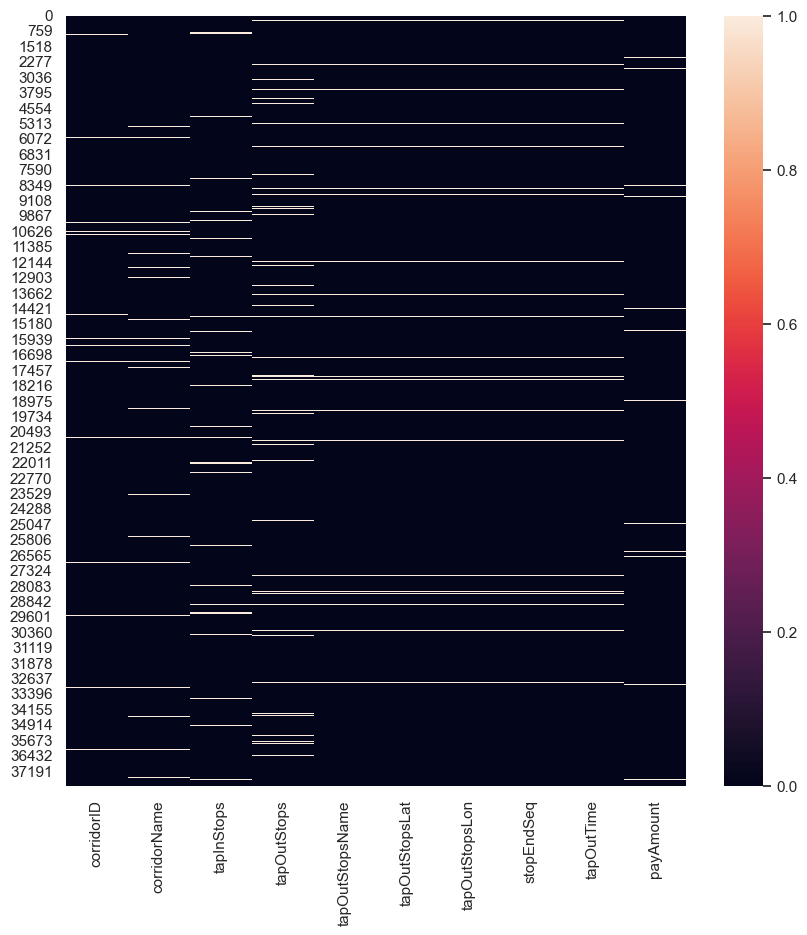

In [196]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime', 'payAmount' ]].isna())

Secara garis besar:  
* missing value di field `tapOutStops` dan `corridorName `memiliki proporsi yang cukup tinggi yakni >= 5% <br>
* missing value di field `corridorID` dan `corridorName` memiliki sebaran yang terlihat berkaitan. dapat dilihat dari garisnya berhubungan. <br>
* missing value di field `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`  dan `tapOutTime ` memiliki sebaran yang terlihat berkaitan <br> 
  dengan persentase nilai missing value yang sama yakni 3.5 % <br>
* missing value pada field payAmount memiliki sebaran yang tidak berkaitan dengan data yang lain.

Ada 2 cara untuk menangani missing value:
1.	Menghapus baris/field yang berisi missing value. 
Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 32%).
2.	Mengisi data yang hilang. 
Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. 
Dalam kasus ini, kita akan mencoba mengisi missing value berdasarkan field lain yang secara domain knowledge atau secara statistik berkaitan dengan field yang memiliki missing value. Jika masih ada field yang tidak bisa diisi, barulah kita mengisi dengan angka mean, median atau modus. Menghapus data akan menjadi opsi terakhir.


#### Menghapus field `transID`

In [197]:
df.drop('transID', axis=1, inplace=True)

#### Mengubah tipe data pada field `payCardID`, `tapInTime` dan  `tapOutTime`

In [198]:
df['payCardID'] = df['payCardID'].astype(str)
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   payCardID         37900 non-null  object        
 1   payCardBank       37900 non-null  object        
 2   payCardName       37900 non-null  object        
 3   payCardSex        37900 non-null  object        
 4   payCardBirthDate  37900 non-null  int64         
 5   corridorID        36643 non-null  object        
 6   corridorName      35970 non-null  object        
 7   direction         37900 non-null  float64       
 8   tapInStops        36687 non-null  object        
 9   tapInStopsName    37900 non-null  object        
 10  tapInStopsLat     37900 non-null  float64       
 11  tapInStopsLon     37900 non-null  float64       
 12  stopStartSeq      37900 non-null  int64         
 13  tapInTime         37900 non-null  datetime64[ns]
 14  tapOutStops       3561

#### Mengubah unique value pada field `direction`

In [199]:
df['direction'] = df['direction'].replace({ 0: "Go", 1: "Back"})

df.head()

,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Back,P00142,Pal Putih,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Go,B01963P,Kemenkes 2,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Go,B00499P,Gg. Kunir II,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Go,B05587P,Taman Elok 1,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Go,P00239,Sunter Boulevard Barat,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


Kita sudah melakukan beberapa tahapan awal:
- Menghapus field `transID` yang mana tidak akan digunakan dalam analysis
- Mengubah datatype dari field `payCardID` dari int64 to object sehingga sesuai dengan informasi awal dataset.
- Mengubah datatype dari field `tapInTime` dan field `tapOutTime` menjadi datetime sesuai dengan informasi awal dataset.
- Mengubah informasi data dari field `direction`. 0 untuk Go dan 1 untuk Back.

Kita sudah melihat gambaran kasar anomali di dalam data kita dan juga melakukan beberapa tahapan awal, sekarang mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  

#### `corridorID` dan `corridorName`
Dari analisis di atas, kita sudah tau bahwa *missing value* pada field `corridorID` dan `corridorName` saling berkaitan. Maka, kita akan memutuskan cara pengisian kedua kolom ini secara bersamaan.  

In [200]:
# jumlah missing value di kolom 'corridorID' dan 'corridorName'
df[['corridorID', 'corridorName']].isna().sum()

corridorID      1257
corridorName    1930
dtype: int64

Terdapat 1.257 data kosong pada field `corridorID` dan 1930 pada field `corridorName`.
Pertama, kita akan coba melihat, apakah data-data kosong pada field `corridorID` dan `corridorName` bisa saling mengisi? Pada tahapan ini akan coba dilakukan teknik maping berdasarkan pemetaan data yang sudah ada. <br>
Hal ini memungkinkan untuk melakukan transformasi pada data dengan mengganti nilai missing value yang ada dalam field dengan nilai lain yang sesuai dengan pemetaan yang telah didefinisikan.

### Mengisi missing value pada field corridorID berdasarkan corridorName yang sesuai <br>
Tindakan ini dilakukan karena masing-masing data pada field `corridorID` secara eksklusif mewakili satu `corridorName`.

Source: <br>
[Daftar Koridor Transjakarta](https://transjakarta.co.id/peta-rute/)

In [201]:
# Memastikan kolom yang kosong diwakili oleh nan
df['corridorID'].fillna(np.nan, inplace=True)

# Membuat pemetaan antara corridorName dan corridorID yang tidak kosong
mapping = df[df['corridorID'].notnull()].groupby('corridorName')['corridorID'].unique().apply(lambda x: x[0])

# Mengisi nilai yang hilang di corridorID berdasarkan corridorName yang sesuai
df['corridorID'].fillna(df['corridorName'].map(mapping), inplace=True)

In [202]:
df['corridorID'].isna().sum()

1125

Dengan menggunakan field `corridorName`, dapat disimpulkan bahwa hanya terisi 132 dari total 1257 nilai yang hilang pada field `corridorID`. Kondisi ini terjadi karena field `corridorName` juga memiliki nilai yang hilang pada baris yang bersesuaian dengan `corridorID`. <br>

### Mengisi missing value pada field `corridorID` berdasarkan `tapInStopsLat` dan `tapInStopLon` <br>
Tindakan ini dilakukan karena berdasarkan domain knowledge koordinat tersebut dapat memberikan penjelasan terkait posisi geografis dari setiap lokasi koridor (field `corridorID`). Dan setiap koordinat adalah unique, sehingga satu `corridorID` hanya memiliki satu koordinat `tapInStopsLat` dan `tapInStopLon`.

In [203]:
df_mapping_corridorID = df.dropna(subset=['corridorID']).drop_duplicates(['tapInStopsLat', 'tapInStopsLon'])
df_mapping_corridorID = df_mapping_corridorID.set_index(['tapInStopsLat', 'tapInStopsLon'])['corridorID']

In [204]:
def fill_corridorID(row):
    if pd.isnull(row['corridorID']) and pd.notnull(row['tapInStopsLat']) and pd.notnull(row['tapInStopsLon']):
        return df_mapping_corridorID.get((row['tapInStopsLat'], row['tapInStopsLon']))
    return row['corridorID']

In [205]:
df['corridorID'] = df.apply(fill_corridorID, axis=1)

df['corridorID'].isna().sum()

33

Diketahui tersisa 33 baris missing value pada field `corridorID` yang bersifat unik, yang mengindikasikan bahwa nilai-nilai tersebut tidak dapat diisi kembali dengan metode yang tersedia.

Sama seperti proses pengisian nilai `corridorID` dengan referensi dari `corridorName`, sekarang kita akan mencoba pendekatan serupa untuk mengatasi nilai yang hilang pada field `corridorName`, menggunakan nilai yang terdapat dalam field `corridorID`.
### Mengisi missing value pada field corridorID berdasarkan corridorName yang sesuai <br>

In [206]:
df['corridorName'].fillna(np.nan, inplace=True)

mapping = df[df['corridorName'].notnull()].groupby('corridorID')['corridorName'].unique().apply(lambda x: x[0])
df['corridorName'].fillna(df['corridorID'].map(mapping), inplace=True)

In [207]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,payCardID,0,0.000
1,payCardBank,0,0.000
2,payCardName,0,0.000
3,payCardSex,0,0.000
4,payCardBirthDate,0,0.000
5,corridorID,33,0.087
6,corridorName,33,0.087
7,direction,0,0.000
8,tapInStops,1213,3.201
9,tapInStopsName,0,0.000


Terdapat 33 baris data dengan nilai yang hilang, yang dapat dihapus karena jumlahnya hanya 0.087 persen dari total baris data yang tersedia. Penghapusan ini diharapkan tidak akan berdampak signifikan pada analisis yang akan dilakukan.

### Mengisi missing value pada field `tapInStops` dengan `tapInStopsName`
Ini serupa dengan pendekatan yang telah digunakan pada pasangan `corridorID` dan `corridorName`. Karena setiap `tapInStopsName` mewakili satu `tapInStops`.

In [208]:
df['tapInStops'].fillna(np.nan, inplace=True)

mapping = df[df['tapInStops'].notnull()].groupby('tapInStopsName')['tapInStops'].unique().apply(lambda x: x[0])
df['tapInStops'].fillna(df['tapInStopsName'].map(mapping), inplace=True)

In [209]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,payCardID,0,0.000
1,payCardBank,0,0.000
2,payCardName,0,0.000
3,payCardSex,0,0.000
4,payCardBirthDate,0,0.000
5,corridorID,33,0.087
6,corridorName,33,0.087
7,direction,0,0.000
8,tapInStops,34,0.090
9,tapInStopsName,0,0.000


Tersisa 34 baris data missing value pada field `tapInStops`, yang dapat dihapus karena jumlahnya hanya 0.09 persen dari total baris data yang tersedia. <br>
Penghapusan ini diharapkan tidak akan berdampak signifikan pada analisis yang akan dilakukan.

### Handling missing value pada field `tapOutStops` dengan `tapOutStopsName`

Masih dengan pendekatan yang sama seperti yang dilakukan pada pasangan `corridorID` dan `corridorName`. Karena setiap `tapOutStopsName` mewakili satu `tapOutStops`.

In [210]:
df['tapOutStops'].fillna(np.nan, inplace=True)

mapping = df[df['tapOutStops'].notnull()].groupby('tapOutStopsName')['tapOutStops'].unique().apply(lambda x: x[0])
df['tapOutStops'].fillna(df['tapOutStopsName'].map(mapping), inplace=True)

In [211]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,payCardID,0,0.000
1,payCardBank,0,0.000
2,payCardName,0,0.000
3,payCardSex,0,0.000
4,payCardBirthDate,0,0.000
5,corridorID,33,0.087
6,corridorName,33,0.087
7,direction,0,0.000
8,tapInStops,34,0.090
9,tapInStopsName,0,0.000


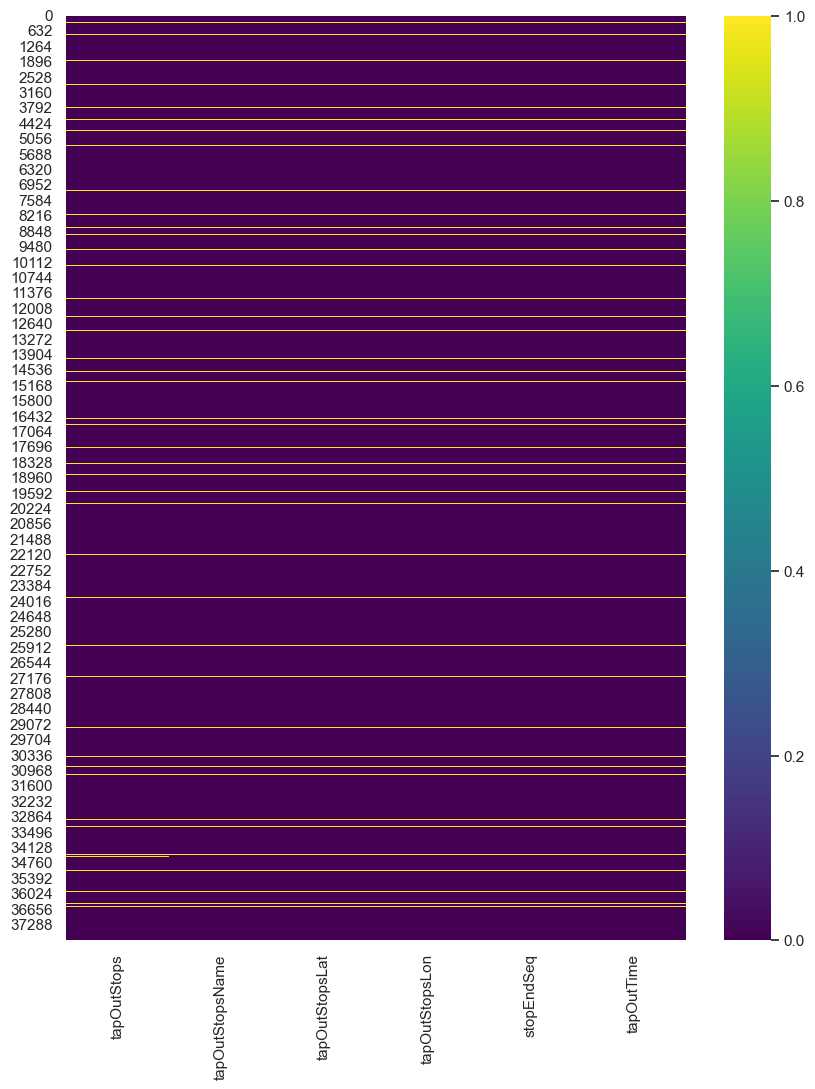

In [212]:
# Menggambarkan sebaran missing value pada kolom tapOutStops dan tapOutStopsName, tapOutStopsLat,tapOutStopsLon, stopEndSeq, dan tapOutTime
plt.figure(figsize=(10, 12))
sns.heatmap(df[['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq','tapOutTime' ]].isnull(), cmap='viridis')
plt.show()

- Setelah proses pemetaan nilai pada field `tapOutStops` dengan menggunakan field `tapOutStopsName`, masih terdapat 1363 baris missing value dari total 2289 missing value yang harus di handling. 
- Berdasarkan heatmap sebaran missing value diatas, diketahui bahwa sebaran missing value di field selain tapOutStops adalah saling berhubungan.
- Menghapus data ini menjadi solusi yang masuk akal, mengingat belum ada metode yang tepat untuk mengisi nilai-nilai ini.
- Menjaga field ini agar tidak kosong menjadi penting untuk meminimalisir distorsi dalam distribusi data.

Penghapusan ini diharapkan tidak akan berdampak signifikan pada analisis yang akan dilakukan.

### Handlng Missing value pada field `payAmount`

Untuk mengisi missing value pada field payAmount yang kosong, pada dasarnya dapat diisi menggunakan *domain knowledge*. Untuk memudahkan pengisian, pertama perlu dicek terlebih dahulu corridorID mana saja yang nilai payAmountnya kosong.

In [213]:
df[df['payAmount'].isna()]['corridorID'].value_counts()

corridorID
M7B        319
JAK.48A    251
M1H        174
JAK.48B    163
3H          92
9D           2
6D           2
6Q           1
B13          1
M3           1
6C           1
Name: count, dtype: int64

Berdasarkan domain knowledge, diketahui nilai payAmount untuk masing-masing koridor ID yang kosong, sebagai berikut:
- corridorID M7B, M1H, 6C, 9D, 6D, 6Q berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/peta-rute/) merupakan Layanan Non BRT dengan tarif Rp. 3500 
- corridorID 3H, M3 berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/peta-rute/) merupakan Layanan BRT dengan tarif Rp. 3500
- corridorID JAK.48A & JAK.48B berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/peta-rute/) dan laman [kompas](https://megapolitan.kompas.com/read/2023/12/08/02000031/rute-mikrotrans-jak48b-stasiun-tebet-kampung-melayu) serta [detik.com](https://news.detik.com/berita/d-6652665/menjajal-mikrotrans-jak48a-angkot-mewah-gratis-dengan-ac-dan-sliding-door) termasuk kategori Mikrotrans (Jaklingko) dengan tarif Rp. 0
- corridorID B13
  Berdasarkan informasi dari [Peta Rute Transjakarta](https://transjakarta.co.id/peta-rute/) bahwa untuk corridor jenis ini merupakan layanan Royaltrans dengan tarif: Rp. 20000



#### Mengisi nilai missing value pada field `payAmount` berdasarkan *domain knowledge*.

In [214]:
df.loc[df['corridorID'] == 'JAK.48A', 'payAmount'] = 0
df.loc[df['corridorID'] == 'JAK.48B', 'payAmount'] = 0
df.loc[df['corridorID'] == 'M7B', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'M1H', 'payAmount'] = 3500
df.loc[df['corridorID'] == '6C', 'payAmount'] = 3500
df.loc[df['corridorID'] == '9D', 'payAmount'] = 3500
df.loc[df['corridorID'] == '6D', 'payAmount'] = 3500
df.loc[df['corridorID'] == '6Q', 'payAmount'] = 3500
df.loc[df['corridorID'] == '3H', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'M3', 'payAmount'] = 3500
df.loc[df['corridorID'] == 'B13', 'payAmount'] = 20000

In [215]:
df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['% Total Missing Value'] = (df_null['Missing Value'] / len(df) * 100).round(3)
df_null

,column,Missing Value,% Total Missing Value
0,payCardID,0,0.000
1,payCardBank,0,0.000
2,payCardName,0,0.000
3,payCardSex,0,0.000
4,payCardBirthDate,0,0.000
5,corridorID,33,0.087
6,corridorName,33,0.087
7,direction,0,0.000
8,tapInStops,34,0.090
9,tapInStopsName,0,0.000


Setelah dilakukan handling missing value berdasarkan *domain knowledge*, untuk field `payAmount` sudah tidak ada lagi missing valuenya.
Selanjutnya dapat dilakukan drop untuk sisa missing value yang masih terdapat pada field `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` mengingat belum ada metode yang tepat untuk mengisi nilai-nilai tersebut.

### Menghapus field yang memiliki missing value

In [216]:
df_drop = ['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']
df.dropna(subset= df_drop, inplace= True)

In [217]:
df.isna().sum()

payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

## Data Clean
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [218]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(36474, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,payCardID,object,0,1980,"[340065298083181, 4727479284006]"
1,payCardBank,object,0,6,"[dki, online]"
2,payCardName,object,0,1973,"[Tania Astuti, Mutia Marbun]"
3,payCardSex,object,0,2,"[M, F]"
4,payCardBirthDate,int64,0,66,"[1964, 1995]"
5,corridorID,object,0,221,"[11, 6T]"
6,corridorName,object,0,216,"[Rusun Cipinang Muara - Jatinegara, Ciledug - Tendean]"
7,direction,object,0,2,"[Go, Back]"
8,tapInStops,object,0,2492,"[B05644P, B01965P]"
9,tapInStopsName,object,0,2491,"[Jagal 1, Budi Kemulyaan]"


Setelah dilakukan penghapusan pada setiap field yang mengandung missing value, diperoleh bahwa jumlah nilai yang dihapus mencapai 1426 baris dari total 37900 baris data yang ada, setara dengan 3.76% dari keseluruhan baris data yang tersedia dan sisa data kosong diisi dengan data yang dirasa relevan.

>#### Menyimpan data ke Format Excel setelah dilakukan Data Cleaning

In [1]:
df.to_excel('Transjakarta_clean.xlsx', index= False)

# Data Analysis


## Data Duplicate

In [ ]:
df.duplicated().sum()

0

## Outlier

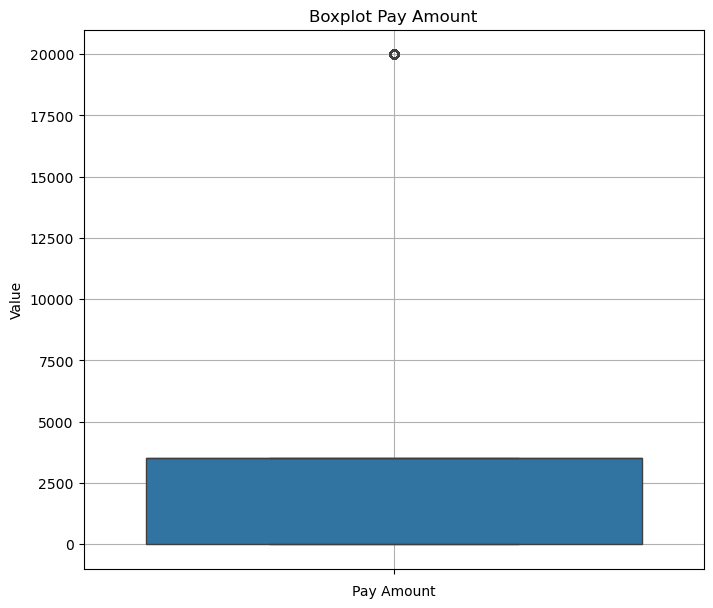

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(df['payAmount'])
plt.title('Boxplot Pay Amount')
plt.xlabel('Pay Amount')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
df['payAmount'].value_counts()

payAmount
3500.0     18404
0.0        16382
20000.0     1688
Name: count, dtype: int64

Tampak bahwa Outlier dari data ada satu nilai, yakni 20000.
Terkait hal ini, outlier tersebut tidak perlu di handle disebabkan sesuai dengan domain knowledge bahwa tiga angka yang dtiampilkan merupakan tarif dari masing-masing layanan Transjakarta.

Source:
- [Jaklingko](https://news.detik.com/berita/d-6652665/menjajal-mikrotrans-jak48a-angkot-mewah-gratis-dengan-ac-dan-sliding-door) termasuk kategori Mikrotrans (Jaklingko)
- [Layanan BRT dan Non BRT](https://transjakarta.co.id/peta-rute/)
- [Royaltrans](https://transjakarta.co.id/produk-dan-layanan/layanan-bus/royaltrans/#:~:text=Layanan%20Royaltrans%20adalah%20layanan%20dari,luar%20bus%2C%20serta%20bagasi%20barang.)


Kita sudah melakukan tahap _data cleaning_ dan pengecekan Outlier. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu lebih dalam mengenai hal-hal yang dapat kita manfaatkan untuk menjawab pertanyaan bisnis untuk kemajuan Transjakarta

### 1. Demografi Pengguna:

>#### Bagaimana Distribusi Pengguna Transjakarta berdasarkan Gender?

In [ ]:
df_gender = df['payCardSex'].value_counts()
df_gender

payCardSex
F    19429
M    17045
Name: count, dtype: int64

In [ ]:
# menghitung persentasi dari distribusi jenis kelamin
(df['payCardSex'].value_counts(normalize=True) * 100).round(2)

payCardSex
F    53.27
M    46.73
Name: proportion, dtype: float64

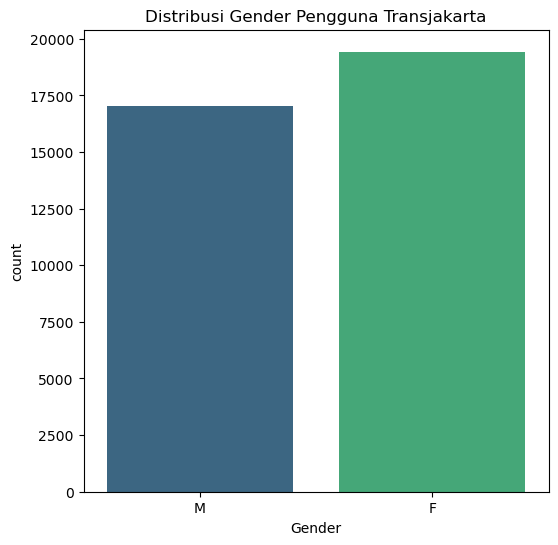

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='payCardSex',  palette='viridis')
plt.title('Distribusi Gender Pengguna Transjakarta')
plt.xlabel('Gender')
plt.show()

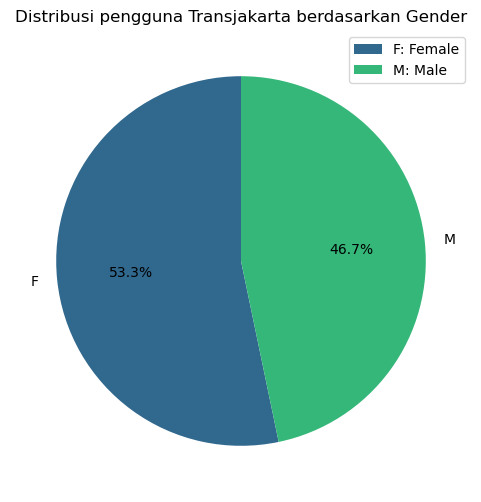

In [ ]:
plt.figure(figsize=(6, 6))
df_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df_gender)))
plt.title('Distribusi pengguna Transjakarta berdasarkan Gender')
plt.legend(['F: Female', 'M: Male'], loc=0)
plt.ylabel('')
plt.show()

- Dari count plot, terlihat bahwa distribusi penumpang wanita mendominasi dibandingkan pria, dengan perbedaan sebanyak 2384 penumpang.
- Meskipun pada pie chart perbedaan proporsi antara pria dan wanita tidak terlalu signifikan, namun secara jumlah penumpang, wanita memiliki kelebihan sebanyak 2384 orang, menunjukkan dampak yang cukup besar.

Data distribusi perbandingan penumpang tersebut merujuk pada data yang diambil dari field `payCardSex` dengan asumsi bahwa gender pengguna **Transjakarta** sesuai dengan jenis kelamin yang terdaftar pada payCard tersebut.

>#### Bagaimana Distribusi Pengguna Transjakarta berdasarkan Usia?

##### Rentang waktu Dataset

In [ ]:
start_time = df['tapInTime'].min()
end_time = df['tapInTime'].max()

print('Rentang waktu dari dataset adalah dimulai pada:', start_time, 'dan berakhir pada:', end_time)

Rentang waktu dari dataset adalah dimulai pada: 2023-04-01 06:22:27 dan berakhir pada: 2023-04-30 21:51:08


Hal yang pertama kita lakukan adalah menghitung usia pengguna berdasarkan tahun pada dataset yang kita gunakan.
Diketahui bahwa dataset yang kita punya memiliki rentang waktu selama 1 bulan, yakni dari tanggal 01 April 2023 hingga 30 April 2023.
Berdasarkan informasi tersebut, kita akan melanjutkan perhitungan usia pengguna berdasarkan tahun dari dataset yang kita punya.

In [ ]:
year = 2023
df['age'] = year - df['payCardBirthDate']

Selanjutnya akan dibagi kelompok usia berdasarkan pengelompokkan yang kita dapatkan dari [Website Kemenkes](https://ayosehat.kemkes.go.id/home)
1. Bayi dan Balita (0 - 5 tahun)
2. Anak-anak (5 - 9 tahun)
3. Remaja (10 - 18 tahun)
4. Dewasa (19 - 59 tahun)
5. Lansia (60+ tahun)

In [ ]:
# membuat kategori untuk mengelompokkan usia

def ageCategories(x):
    if x < 5:
        return 'Balita'
    elif x >= 5 and x < 10:
        return 'Anak-anak'
    elif x >= 10 and x < 19:
        return 'Remaja'
    elif x >= 19 and x < 60:
        return 'Dewasa'
    else:
        return 'Lansia'

df['ageCategory'] = df['age'].apply(ageCategories)

In [ ]:
df_age_categories_counts = df['ageCategory'].value_counts()
df_age_categories_counts

ageCategory
Dewasa    29818
Remaja     5913
Lansia      743
Name: count, dtype: int64

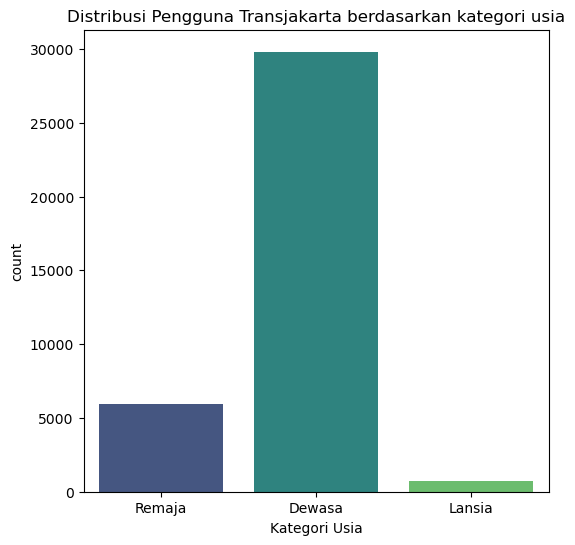

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='ageCategory',  palette='viridis')
plt.title('Distribusi Pengguna Transjakarta berdasarkan kategori usia')
plt.xlabel('Kategori Usia')
plt.show()

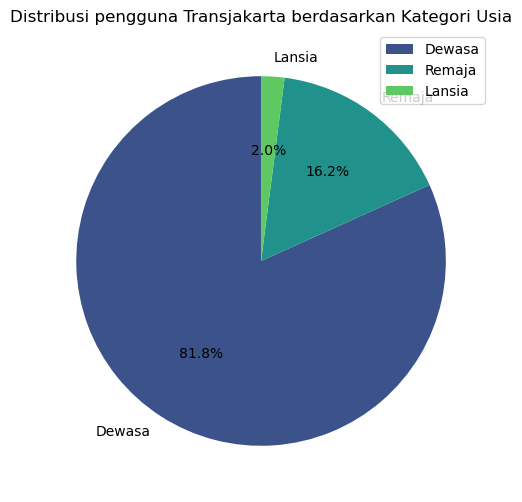

In [ ]:
plt.figure(figsize=(6, 6))
df_age_categories_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(df_age_categories_counts)))
plt.title('Distribusi pengguna Transjakarta berdasarkan Kategori Usia')
plt.legend(['Dewasa', 'Remaja', 'Lansia'], loc=0)
plt.ylabel('')
plt.show()

In [ ]:
for i in ['ageCategory']:
    fig=px.sunburst(df,path=[i,'payCardSex'],color='payCardSex', title='Distribusi Pengguna Transjakarta berdasarkan Usia')
    fig.show()

Berdasarkan grafik-garifk diatas diketahui bahwa:
- Mayoritas pengguna Transjakarta pada bulan April 2023 berada dalam kategori usia Dewasa, mencapai 81.4% dari total transaksi yang dilakukan, setara dengan 29818 penumpang. 
- Ini disebabkan karna kategori usia tersebut merupakan [kategori penduduk usia produktif](https://m.beritajakarta.id/read/114643/buka-peluang-kerja-usia-produktif-pemprov-dki-optimalkan-peran-pjlp-melalui-kepgub-10952022#:~:text=Sebagai%20informasi%2C%20kelompok%20penduduk%20Provinsi,Jakarta%20juga%20didominasi%20kaum%20muda.) sehingga mereka akan lebih sering menggunakan Transjakarta dibandingkan dengan kelompok usia yang lain.
- Selanjutnya disusul oleh kelompok usia remaja sebanyak 16% dan terakhir kelompok usia Lansia.
- Kategori usia remaja dan dewasa, didominasi oleh wanita.
- Sementara untuk kategori usia Lansia, diketahui bahwa Pria lebih banyak dibanding Wanita.

Data distribusi perbandingan penumpang tersebut merujuk pada data yang diambil dari field `payCardBirthdate` dengan asumsi bahwa tahun kelahiran pengguna **Transjakarta** sesuai dengan tahun kelahiran yang terdaftar pada payCard tersebut.

>#### Bagaimana Distribusi Usia dan Gender pengguna terhadap Metode Pembayaran?

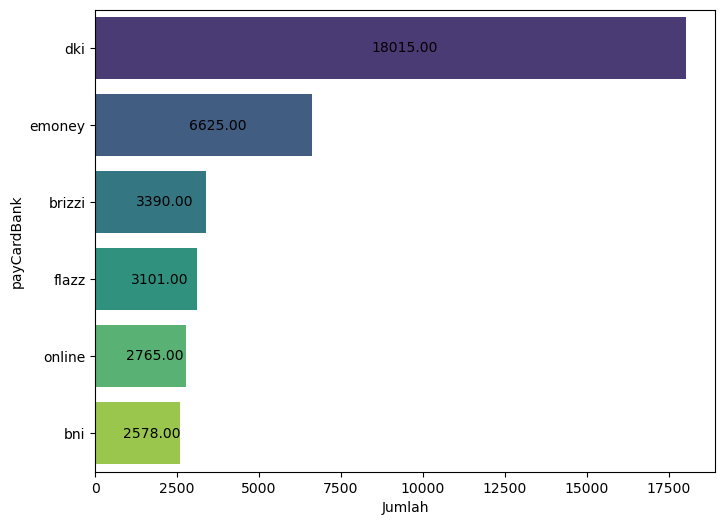

In [ ]:
df_payment = pd.crosstab(index = df['payCardBank'], columns = 'Jumlah').reset_index().sort_values(by='Jumlah', ascending=False)

plt.figure(figsize= (8,6))
plots = sns.barplot(data=df_payment, y='payCardBank', x='Jumlah', palette='viridis')

for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width()/2, bar.get_y() + bar.get_height() / 2),  
                   ha='center', va='center',
                   size=10, xytext=(10, 0), 
                   textcoords='offset points')

In [ ]:
# Menghitung Distribusi pengguna payCardBank berdasarkan Gender
df_ct1 = pd.crosstab(index=df['payCardBank'], columns=df['payCardSex'])
df_ct1['Total'] = df_ct1.sum(axis=1)
df_ct1.sort_values('Total',ascending=False)

payCardSex,F,M,Total
payCardBank,,,
dki,9174,8841,18015
emoney,3929,2696,6625
brizzi,1749,1641,3390
flazz,1755,1346,3101
online,1351,1414,2765
bni,1471,1107,2578


In [ ]:
# Menghitung Distribusi pengguna payCardBank berdasarkan kategori usia
df_ct2 = pd.crosstab(index=df['payCardBank'], columns=df['ageCategory'])
df_ct2['Total'] = df_ct2.sum(axis=1)
df_ct2.sort_values('Total',ascending=False)

ageCategory,Dewasa,Lansia,Remaja,Total
payCardBank,,,,
dki,14980,458,2577,18015
emoney,5085,78,1462,6625
brizzi,2849,53,488,3390
flazz,2576,93,432,3101
online,2284,52,429,2765
bni,2044,9,525,2578


In [ ]:
# Menghitung Distribusi pengguna payCardBank berdasarkan kategori usia dan gender
df_ct3 = pd.crosstab(index=df['payCardBank'], columns=[ df['ageCategory'],df['payCardSex']])
df_ct3['Total'] = df_ct3.sum(axis=1)
df_ct3.sort_values('Total',ascending=False)

ageCategory Dewasa       Lansia      Remaja       Total
payCardSex       F     M      F    M      F    M       
payCardBank                                            
dki           7425  7555     43  415   1706  871  18015
emoney        2881  2204     37   41   1011  451   6625
brizzi        1491  1358      0   53    258  230   3390
flazz         1434  1142      8   85    313  119   3101
online        1074  1210      4   48    273  156   2765
bni           1155   889      0    9    316  209   2578

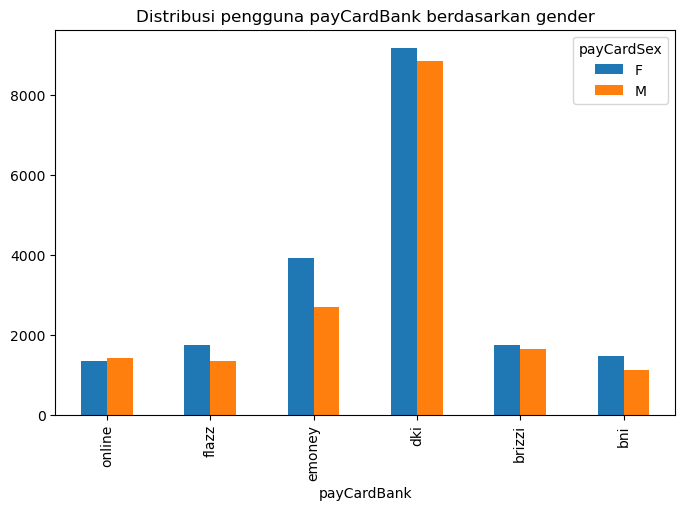

In [ ]:
df_ct1.sort_values(by='payCardBank', ascending=False).drop(columns='Total').plot(kind='bar', figsize=(8,5),
title='Distribusi pengguna payCardBank berdasarkan gender')
plt.show()

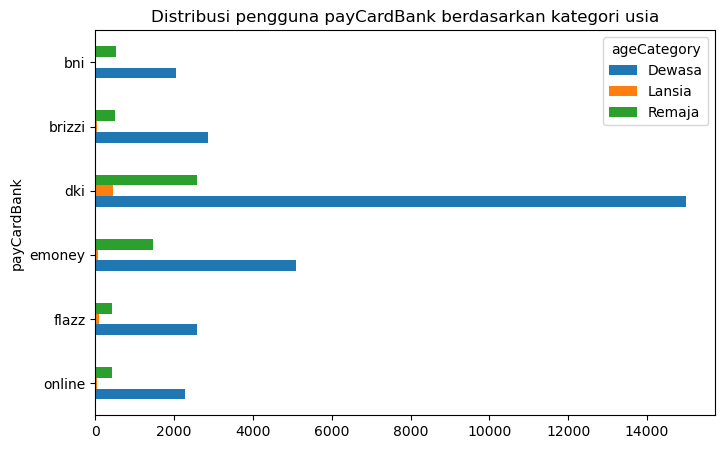

In [ ]:
df_ct2.sort_values(by='payCardBank', ascending=False).drop(columns='Total').plot(kind='barh', figsize=(8,5),
title='Distribusi pengguna payCardBank berdasarkan kategori usia')
plt.show()


Berdasarkan grafik-grafik diatas diketahui bahwa:
- Mayoritas pengguna Transjakarta menggunakan kartu dari Bank DKI sebagai metode pembayaran perjalanan mereka dengan jumlah distribusi penumpang 18015.
- Distribusi metode pembayaran didominasi oleh kelompok usia dewasa.
- Penumpang wanita mendominasi semua jenis pembayaran dengan perbedaan yang terlihat kecil, walaupun untuk pembayaran online didominasi oleh pria, namun perbedaannya terbilang lebih kecil yakni 63 penumpang, jika diasumsikan sebaran ini merata setiap harinya, maka hanya terdapat 2-3 orang setiap harinya. 
- Hal ini sejalan dengan mendominasinya distribusi penumpang wanita.
- Menariknya diketahui bahwa penumpang lansia dengan gender wanita tidak ada yang menggunakan kartu brizzi keluaran Bank BRI dan juga kartu BNI, berbeda dengan pria dari kategori usia yang sama, mereka menggunakan semua jenis pembayaran yang ada.
- Diketahui berdasarkan domain knowledge bahwa untuk pembayaran jenis online, dilakukan melalui aplikasi keluaran Transjakarta yang bernama 'Tije'. 
- Metode ini terlihat cukup diminati walaupun berada diperingkat lima diantara enam jenis pembayaran yang tersedia.
- Dalam rangka mewujudkan misi Transjakarta: `Bersama-sama menyediakan layanan transportasi terintegrasi yang memudahkan dan membahagiakan kehhidupan Jakarta`, kedepannya aplikasi ini dapat lebih diperhatikan agar dapat lebih diminati oleh pengguna.

### 2. Tren Penggunaan

>##### Bagaimana pola penggunaan Transjakarta dalam rentang waktu satu bulan?
Untuk memudahkan kita dalam menganalisis pola waktu penggunaan Transjakarta, kita dapat membuat field baru dari field tapInTime dan tapOutTime yang sebelumnya sudah ubah datetype nya ke data time. Kita akan coba kelompokkan ke beberapa klasifikasi lain untuk membantu dalam anlysis data. Kita dapat mengelompokkannya menjadi: Hour, Day dan Date.<br>

Dalam bulan April 2023, terdapat sejumlah hari libur penting seperti perayaan Hari Raya Idul Fitri dan cuti bersama. Oleh karena itu, perlu dilakukan evaluasi terhadap pola penggunaan layanan Transjakarta selama periode tersebut. Evaluasi ini menjadi pertimbangan esensial dalam upaya untuk mengoptimalkan alokasi armada pada masa-masa libur mendatang.

In [ ]:
df['tapInDate'] = df['tapInTime'].dt.strftime('%d')

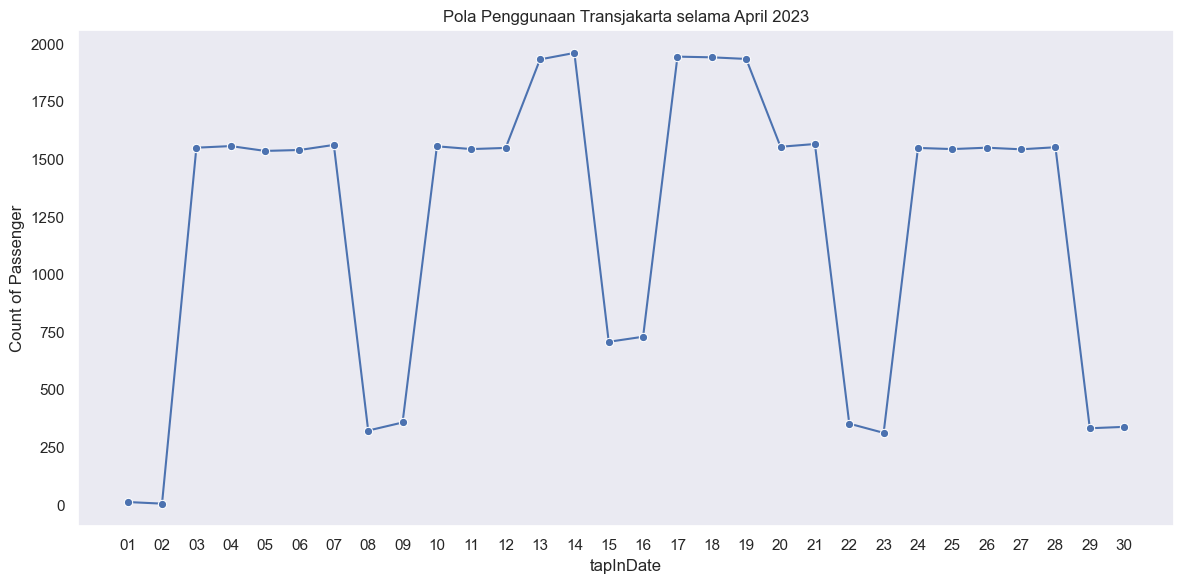

In [ ]:
passenger_count = df.groupby('tapInDate').size()

sns.set(style="darkgrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=passenger_count.index, y=passenger_count.values, marker='o')
plt.ylabel('Count of Passenger')
plt.title('Pola Penggunaan Transjakarta selama April 2023')
plt.tight_layout()
plt.grid(False)

plt.show()

- Pada tanggal 01 dan 02 April terlihat bahwa sedikit sekali pengguna, ini kemungkinan disebabkan oleh missing value dari data yang kita hapus sebelumnya pada tahapan data cleaning.
- Terlihat ada pola kenaikan selama rentang 5 hari dan penurunan 2 hari setelahnya. Ini merujuk pada hari kerja dan akhir pekan. 5 hari yang naik merupakan hari kerja, dan 2 hari yang menurun merupakan akhir pekan.
- Pengguna Transjakarta lebih sering menggunakan Transjakarta saat hari kerja, bisa diasumsikan untuk pergi bekerja, sekolah atau hal lainnya.
- Saat libur Lebaran pada tanggal 22 dan 23 yang kebetulan pada hari akhir pekan, juga mencerminkan tren penurunan dalam penggunaan layanan tersebut. 
- Terdapat jumlah penumpang yang menggunakan transjakarta dikisaran 400-700 penumpang perhari pada saat akhir pekan. 

>##### Bagaimana Persebaran penggunaan Transjakarta pada jam-jam tertentu sepanjang hari? 
       Apakah ada pola perbedaan antara hari kerja dan akhir pekan?
##### `Weekday` VS `Weekend`

In [ ]:
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

In [ ]:
df['tapInDay'] = df['tapInTime'].dt.dayofweek
df['tapOutDay'] = df['tapOutTime'].dt.dayofweek

dayMapping = { 0: 'Monday', 
               1: 'Tuesday', 
               2: 'Wednesday', 
               3: 'Thursday', 
               4: 'Friday', 
               5: 'Saturday', 
               6: 'Sunday'}

df['tapInDay'] = df['tapInDay'].map(dayMapping)
df['tapOutDay'] = df['tapOutDay'].map(dayMapping)

In [ ]:
df_weekday = df[df['tapInDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
cross_weekday = pd.crosstab(df_weekday['tapInDay'], df_weekday['tapInHour'])
cross_weekday

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
tapInDay,,,,,,,,,,,,,,,,,
Friday,619,1084,483,527,513,23,29,23,26,1,34,621,1002,413,441,428,378
Monday,600,1107,524,502,489,14,26,16,35,1,26,600,1008,419,441,430,366
Thursday,621,1070,485,512,503,20,27,21,26,3,37,598,986,451,406,409,399
Tuesday,591,1092,525,494,496,16,26,28,20,2,28,593,1014,416,415,440,395
Wednesday,592,1077,478,514,517,28,26,31,17,1,31,611,1017,429,435,389,381


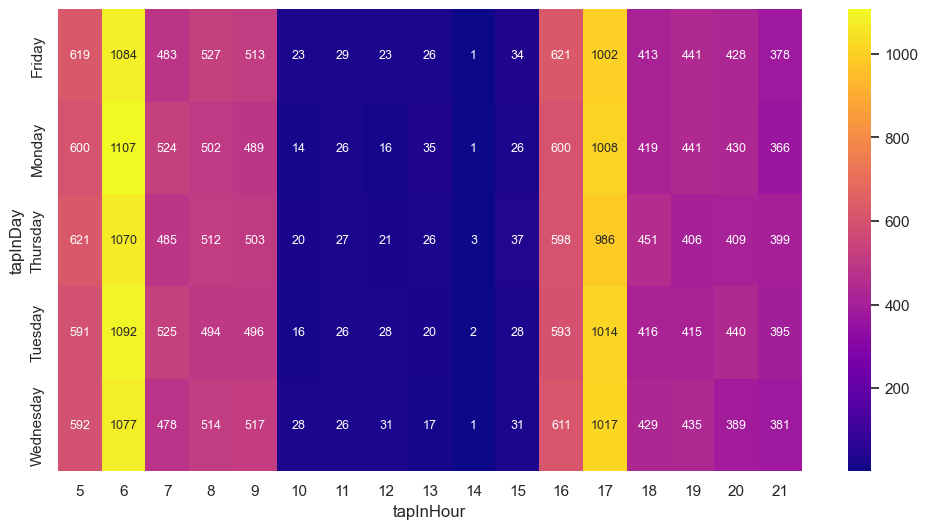

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(cross_weekday, annot=True, 
            annot_kws={'size':9}, fmt='.0f',
            cmap='plasma')
plt.show()

Berdasarkan visualisasi heatmap diatas, diketahui bahwa:
- Puncak Penggunaan terjadi pada Jam Berangkat dan Pulang Kerja:
  Pada hari kerja, terjadi peningkatan signifikan dalam penggunaan Transjakarta pada jam berangkat kerja (05:00 - 09:00) dan pulang kerja (16:00 - 18:00).
- Penggunaan menurun di jam 10:00 - 15:00 kemungkinan karena sebagian besar orang sudah berada di tempat kerja pada saat itu.
- Variasi dalam penggunaan pada jam 10:00 - 15:00, mungkin karena aktivitas masyarakat yang beragam, seperti rapat, perjalanan bisnis, atau urusan pribadi.
- Penggunaan Transjakarta cenderung konsisten setiap hari kerja, dengan perbedaan yang relatif kecil antara hari Senin hingga Jumat.

In [ ]:
df_weekend = df[df['tapInDay'].isin(['Saturday', 'Sunday'])]
cross_weekend = pd.crosstab(df_weekend['tapInDay'], df_weekend['tapInHour'])
cross_weekend

tapInHour,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
tapInDay,,,,,,,,,,,,,,,,,
Saturday,110,91,91,116,103,88,91,109,99,79,116,111,138,106,109,103,75
Sunday,101,98,107,114,93,98,102,99,115,80,114,101,116,98,117,127,71


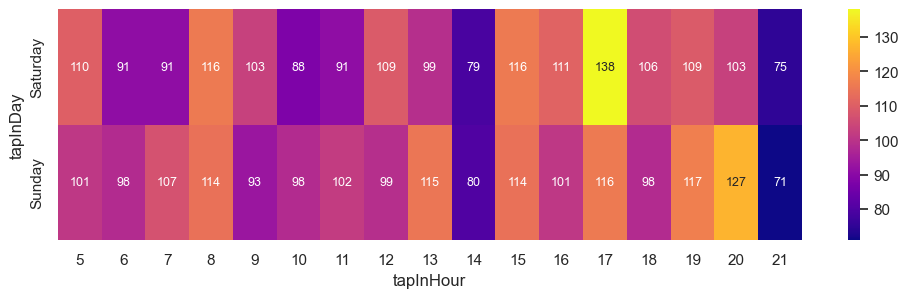

In [ ]:
plt.figure(figsize=(12,3))
sns.heatmap(cross_weekend, annot=True, 
            annot_kws={'size':9}, fmt='.0f',
            cmap='plasma')
plt.show()

Berdasarkan heatmap diatas, diketahui bahwa:
- Peningkatan Penggunaan di awal sore hingga malam hari: <br>
Pada akhir pekan, terjadi peningkatan penggunaan Transjakarta pada jam-jam sore hingga malam hari (15:00 - 21:00). Ini mungkin disebabkan oleh kegiatan sosial, rekreasi, atau perjalanan keluar pada akhir pekan.
- Penggunaan Awal Pagi Stabil: <br>
Penggunaan pada jam awal pagi pada akhir pekan (5:00 - 10:00) cukup stabil dan mungkin terkait dengan kegiatan seperti belanja pagi atau perjalanan liburan akhir pekan.
- Penggunaan Lebih Konsisten pada Hari Sabtu:
Penggunaan Transjakarta pada hari Sabtu cenderung lebih konsisten dibandingkan hari Minggu, yang mungkin dipengaruhi oleh perbedaan aktivitas dan kebiasaan masyarakat pada hari Minggu.
- Potensi Penggunaan untuk Hiburan Malam:
Peningkatan penggunaan pada jam 19:00 - 20:00 pada hari Sabtu menunjukkan potensi bahwa beberapa orang menggunakan Transjakarta untuk pergi ke acara atau hiburan malam.

### 3. Pola Perjalanan dan Rute:

> #### Bagaimana distribusi perjalanan pengguna pada koridor dan Halte tertentu pada saat peak hour?

Untuk distribusi perjalanan Pengguna Transjakarta yang akan dianalisa hanya pada saat hari kerja.
Karna pada Weekend, diketahui bahwa persebaran penumpang setiap jamnya cukup merata, walaupun jika dilihat dari peak timenya terdapat pada jam 17 dihari sabtu dan 20 di hari minggu namun angka penumpang jika dibandingkan dengan hari kerja sangat jauh. Sehingga tidak perlu dianalisa lebih jauh. Sehinggan analisanya akan  difokuskan pada Weekday.

Hal pertama yang akan dilakukan adalah menentukan pembagian peak hour berdasarkan informasi yang kita peroleh sebelumnya pada pola penggunaan Transjkarta. Diketahui peak hour terjadi pada jam 05:00 - 09:00 dipagi hari dengan peak time di jam 6 pagi. Kemudian pada jam 16:00 - 21:00 di sore hingga malam hari dengan peak time di jam 17 sore. Diluar jam tersebut bukan termasuk peak hour. Fokus kita adalah untuk menangani peak hour saat hari kerja kerja.

In [ ]:
def peak_time_weekday(x):
    if 5 <= x <= 9:
        return 'Morning Peak Hour'
    elif 16 <= x <= 21:
        return 'Evening Peak Hour'
    else:
        return 'Non Peak Hour'
    
df['peak_hourwd'] = df['tapInHour'].apply(peak_time_weekday)

In [ ]:
df.head(5)

,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutTime,payAmount,age,ageCategory,tapInDate,tapInHour,tapOutHour,tapInDay,tapOutDay,peak_hourwd
0,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Back,P00142,Pal Putih,...,2023-04-03 06:00:53,3500.0,15,Remaja,03,5,6,Monday,Monday,Morning Peak Hour
1,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Go,B01963P,Kemenkes 2,...,2023-04-03 06:40:01,3500.0,26,Dewasa,03,5,6,Monday,Monday,Morning Peak Hour
2,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Go,B00499P,Gg. Kunir II,...,2023-04-03 06:50:55,3500.0,31,Dewasa,03,5,6,Monday,Monday,Morning Peak Hour
3,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Go,B05587P,Taman Elok 1,...,2023-04-03 06:28:16,3500.0,45,Dewasa,03,5,6,Monday,Monday,Morning Peak Hour
4,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Go,P00239,Sunter Boulevard Barat,...,2023-04-03 06:57:03,3500.0,41,Dewasa,03,6,6,Monday,Monday,Morning Peak Hour


> Morning Peak Time in Weekday

In [ ]:
weekday_morning = df[(df['tapInDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hourwd'] == "Morning Peak Hour")]

df_weekday_morning = weekday_morning.groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
df_weekday_morning = df_weekday_morning.sort_values(by='Count', ascending=False).head(10)

df_weekday_morning


,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,189
214,S21,Ciputat - CSW,177
119,JAK.06,Kampung Rambutan - Pondok Gede,160
195,JIS3,Harmoni - Jakarta International Stadium,158
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,158
92,8C,Kebayoran Lama - Tanah Abang,154
44,2E,Rusun Rawa Bebek - Kodamar,143
162,JAK.42,Kampung Melayu - Pondok Kelapa,140
100,9D,Pasar Minggu - Tanah Abang,139
15,11Q,Kampung Melayu - Pulo Gebang via BKT,138


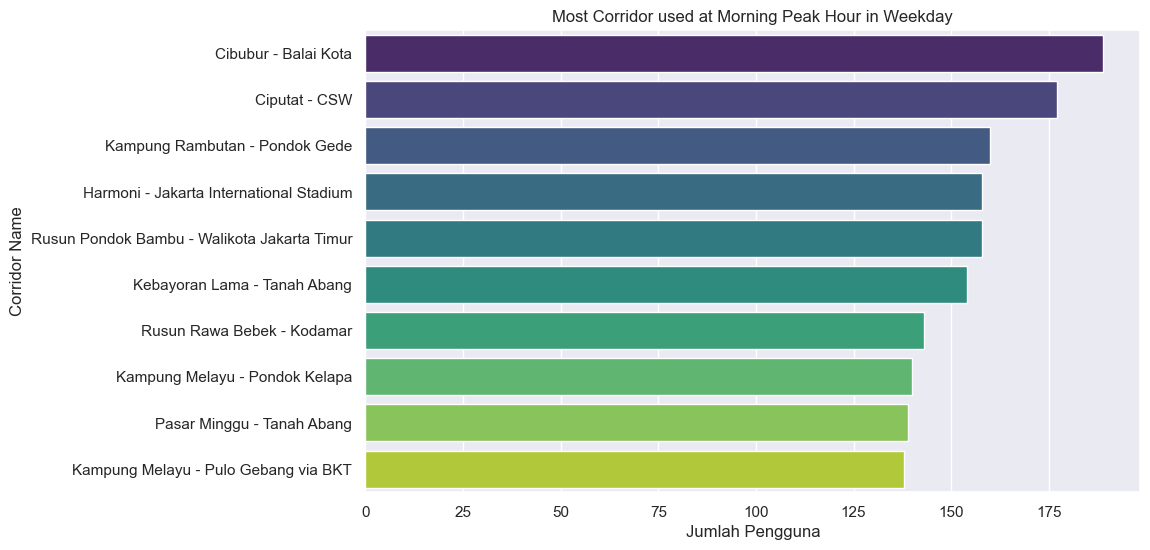

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_weekday_morning, y='corridorName', x='Count', order=df_weekday_morning['corridorName'].value_counts().index, palette='viridis')
plt.title('Most Corridor used at Morning Peak Hour in Weekday')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Corridor Name')
plt.show()

> Evening Peak Time in Weekday

In [ ]:
weekday_evening = df[(df['tapInDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['peak_hourwd'] == "Evening Peak Hour")]

df_weekday_evening = weekday_evening.groupby(['corridorID', 'corridorName']).size().reset_index(name='Count')
df_weekday_evening = df_weekday_evening.sort_values(by='Count', ascending=False).head(10)

df_weekday_evening


,corridorID,corridorName,Count
40,1T,Cibubur - Balai Kota,190
214,S21,Ciputat - CSW,180
119,JAK.06,Kampung Rambutan - Pondok Gede,162
195,JIS3,Harmoni - Jakarta International Stadium,160
14,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,158
92,8C,Kebayoran Lama - Tanah Abang,156
208,M7B,BKN - Blok M,145
44,2E,Rusun Rawa Bebek - Kodamar,144
100,9D,Pasar Minggu - Tanah Abang,143
76,6N,Ragunan - Blok M via Kemang,141


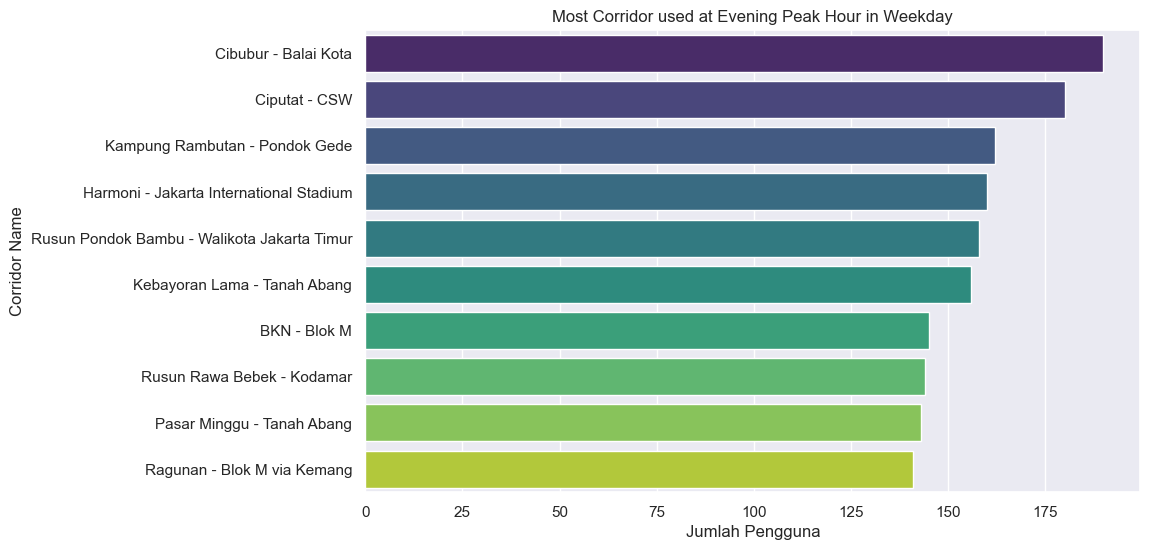

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_weekday_evening, y='corridorName', x='Count', order=df_weekday_evening['corridorName'].value_counts().index, palette='viridis')
plt.title('Most Corridor used at Evening Peak Hour in Weekday')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Corridor Name')
plt.show()

Berdasarkan grafik-grafik diatas diketahui bahwa: 

`1. Cibubur - Balai Kota (ID: 1T)`
  - Koridor ini menunjukkan tingkat penggunaan yang tinggi baik pada saat morning maupun evening peak hour.
  - Hal ini karna koridor tersebut menjangkau pusat kota dan pusat perkantoran/bisnis dari arah Jakarta Timur - Jakarta Pusat.
  - Koridor ini menggunakan Transjakarta tipe layanan Royaltrans.
  - Layanan [Royaltrans](https://transjakarta.co.id/produk-dan-layanan/layanan-bus/royaltrans/) adalah layanan dari Transjakarta dengan tarif premium sebesae Rp. 20000, yang dilengkapi dengan fasilitas seperti tempat duduk dengan busa yang lebar dan reclining seat, USB port di setiap kursi, 12 camera CCTV yang memantau setiap area di dalam dan di luar bus, serta bagasi barang.
  - Bus-bus Royaltrans merupakan bus kelas premium berkapasitas [30 penumpang](https://megapolitan.kompas.com/read/2019/04/22/19172151/penumpang-nyaman-dengan-layanan-royaltrans-dari-dan-ke-stasiun-mrt.), tanpa penumpang berdiri.

`2. Koridor selanjutnya adalah Ciputat - CSW (S21) : `
- Koridor ini juga menarik perhatian dengan jumlah penggunaan yang hampir sebanding dengan Cibubur - Balai Kota baik pada saat morning maupun evening peak hour.
- Hal ini karena merupakaan jalur penghubung Tangerang Kota ke Jakarta Selatan.
- [Bus Transjabodetabek](https://megapolitan.kompas.com/read/2023/02/18/01450021/rute-transjabodetabek-s21-csw-ciputat) koridor S21 merupakan bus pengumpan yang beroperasi dengan jurusan dari CSW ke Ciputat. 
- Rute bus ini menghubungkan jalan-jalan strategis dari kawasan Jakarta Selatan. 
- Tarif bus sama seperti bus Transjakarta pada umumnya sebesar Rp 3.500. 
- Saat jam berangkat dan pulang kerja, rute ini cukup ramai penumpang sebab menjangkau area perkantoran di Pondok Indah, Ciputat dan Blok M.  
- Bus melewati tempat strategis seperti Stasiun MRT Blok M, Taman Martha Tiahahu, Kramat Pela, Pondok Indah, Lebak Bulus, Situ Gintung, UIN, Pasar Ciputat dan lainnya. 
- Bus beroperasi setiap hari dari pukul 05.00-22.00 WIB.

3. Koridor lainnya terlihat persebarannya cukup merata.

Untuk analisa lanjutan akan dilakukan pada Koridor Ciputat - CSW. Walaupun merupakan koridor dengan jumlah penggunaan terbanyak kedua, namun perannya sebagai [bus pengumpan](https://megapolitan.kompas.com/read/2023/02/18/01450021/rute-transjabodetabek-s21-csw-ciputat) sehingga perlu diperhatikan.  

## Analisa Koridor `Ciputat - CSW (S21)`

> ### Distribusi Demografis Pengguna Ciputat - CSW (S21)`

`Berdasarkan Gender`

In [ ]:
# sns.set_palette('coolwarm')

In [ ]:
df_copy = df[df['corridorName'] == 'Ciputat - CSW']
df_copy.head()

,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,...,tapOutTime,payAmount,age,ageCategory,tapInDate,tapInHour,tapOutHour,tapInDay,tapOutDay,peak_hourwd
208,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,Go,B05904P,Yado I,...,2023-04-03 06:57:30,3500.0,13,Remaja,03,6,6,Monday,Monday,Morning Peak Hour
508,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,Back,B05232P,Situ Gintung 1,...,2023-04-03 18:39:40,3500.0,13,Remaja,03,17,18,Monday,Monday,Evening Peak Hour
808,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,Go,B05904P,Yado I,...,2023-04-04 05:59:02,3500.0,13,Remaja,04,5,5,Tuesday,Tuesday,Morning Peak Hour
1108,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,Back,B05232P,Situ Gintung 1,...,2023-04-04 19:10:01,3500.0,13,Remaja,04,17,19,Tuesday,Tuesday,Evening Peak Hour
1708,4628562596639925,dki,Tira Saptono,M,2010,S21,Ciputat - CSW,Back,B05232P,Situ Gintung 1,...,2023-04-05 19:02:33,3500.0,13,Remaja,05,17,19,Wednesday,Wednesday,Evening Peak Hour


In [ ]:
df_gender_s21 = df_copy['payCardSex'].value_counts()
df_gender_s21

payCardSex
M    258
F    125
Name: count, dtype: int64

In [ ]:
# menghitung persentasi dari distribusi jenis kelamin pada koridor S21
(df_copy['payCardSex'].value_counts(normalize=True) * 100).round(2)

payCardSex
M    67.36
F    32.64
Name: proportion, dtype: float64

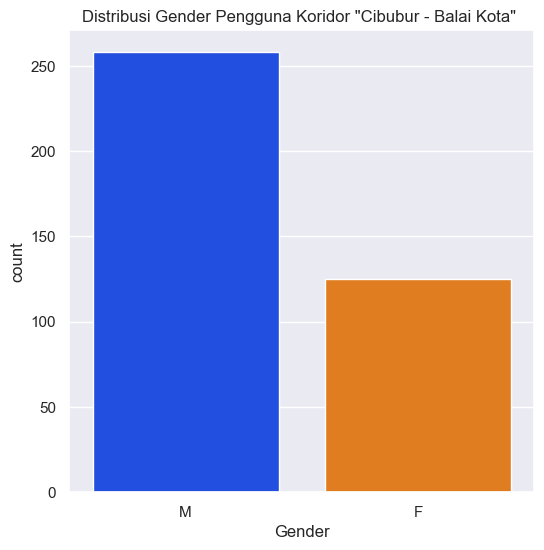

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_copy, x='payCardSex',  palette='bright')
plt.title('Distribusi Gender Pengguna Koridor "Cibubur - Balai Kota" ')
plt.xlabel('Gender')
plt.show()

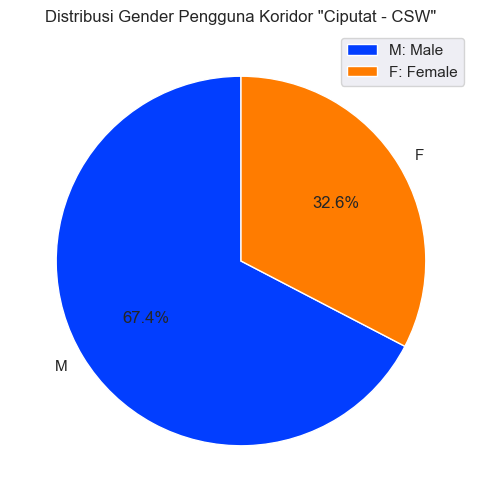

In [ ]:
plt.figure(figsize=(6, 6))
df_gender_s21.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright', len(df_gender_s21)))
plt.title('Distribusi Gender Pengguna Koridor "Ciputat - CSW"')
plt.legend(['M: Male','F: Female'], loc=0)
plt.ylabel('')
plt.show()

Insight: <br>
Distribusi pengguna Koridor S21 berdasarkan gender menunjukkan bahwa mayoritas pengguna adalah pria (67.36%), sementara perempuan menyumbang 32.64% dari total pengguna. Ini bisa menjadi indikasi bahwa terdapat perbedaan signifikan dalam preferensi pengguna berdasarkan gender di Koridor S21. 


`Berdasarkan Kategori Usia Tertentu`

ageCategory
Dewasa    307
Remaja     76
Name: count, dtype: int64


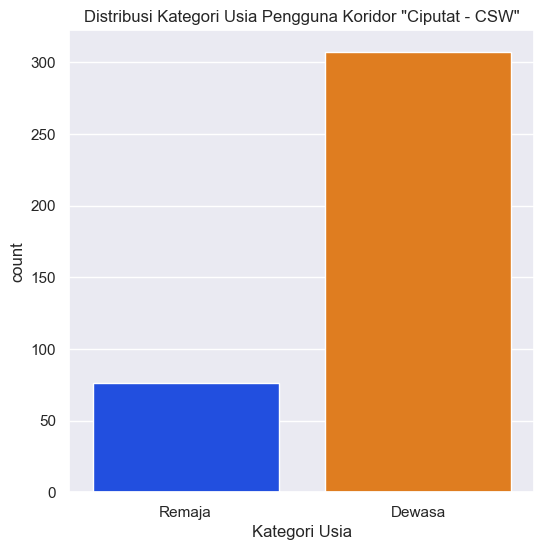

In [ ]:
df_age_categories_counts21 = df_copy['ageCategory'].value_counts()
print(df_age_categories_counts21)

plt.figure(figsize=(6, 6))
sns.countplot(data=df_copy, x='ageCategory',  palette='bright')
plt.title('Distribusi Kategori Usia Pengguna Koridor "Ciputat - CSW"')
plt.xlabel('Kategori Usia')
plt.show()

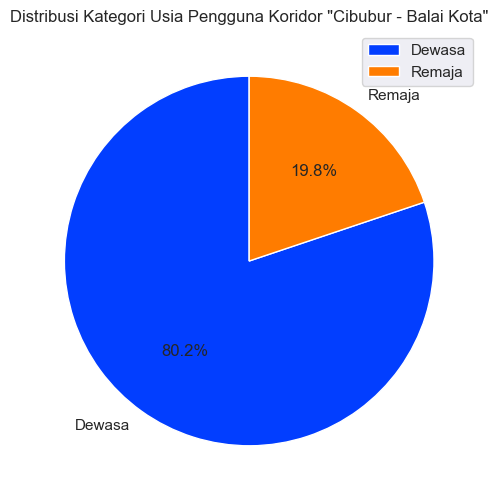

In [220]:
plt.figure(figsize=(6, 6))
df_age_categories_counts21.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright', len(df_age_categories_counts21)))
plt.title('Distribusi Kategori Usia Pengguna Koridor "Cibubur - Balai Kota"')
plt.legend(['Dewasa', 'Remaja', 'Lansia'], loc=0)
plt.ylabel('')
plt.show()

Insight: <br>
- Distribusi pengguna Koridor S21 berdasarkan kategori usia menunjukkan mayoritas pengguna adalah dewasa, mencapai 80.2% dari total pengguna, sementara remaja menyumbang 19.8%. Tidak ada representasi bayi dan balita, anak-anak, atau lansia dalam data ini.

- Hal ini menunjukkan bahwa Koridor S21 melayani secara signifikan kelompok usia dewasa dan remaja. 

`Berdasarkan Bank Card yang digunakan`

col_0 payCardBank  Jumlah
0             bni     133
2             dki     124
3          emoney      82
5          online      39
1          brizzi       4
4           flazz       1


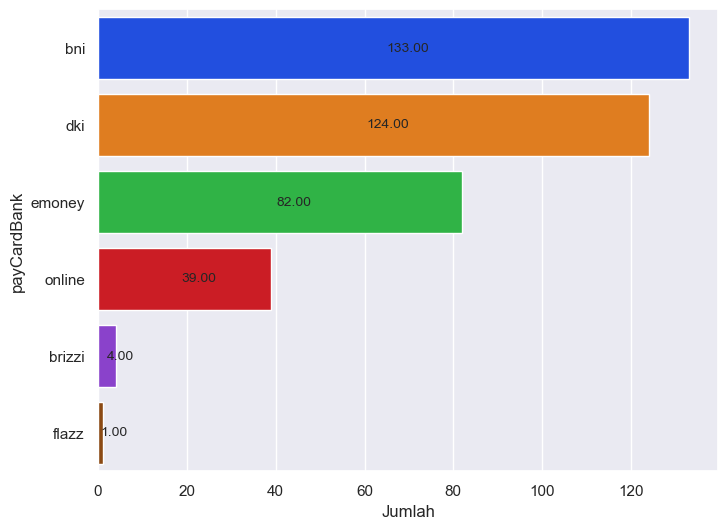

In [221]:
df_payments21 = pd.crosstab(index = df_copy['payCardBank'], columns = 'Jumlah').reset_index().sort_values(by='Jumlah', ascending=False)
print(df_payments21)

plt.figure(figsize= (8,6))
plots = sns.barplot(data=df_payments21, y='payCardBank', x='Jumlah', palette='bright')

for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width()/2, bar.get_y() + bar.get_height() / 2),  
                   ha='center', va='center',
                   size=10, xytext=(10, 0), 
                   textcoords='offset points')

In [120]:
# Menghitung Distribusi pengguna payCardBank berdasarkan kategori Gender
df_cts21 = pd.crosstab(index=df_copy['payCardBank'], columns=df_copy['payCardSex'])
df_cts21['Total'] = df_cts21.sum(axis=1)
df_cts21.sort_values('Total',ascending=False)

payCardSex,F,M,Total
payCardBank,,,
bni,78,55,133
dki,3,121,124
emoney,41,41,82
online,1,38,39
brizzi,2,2,4
flazz,0,1,1


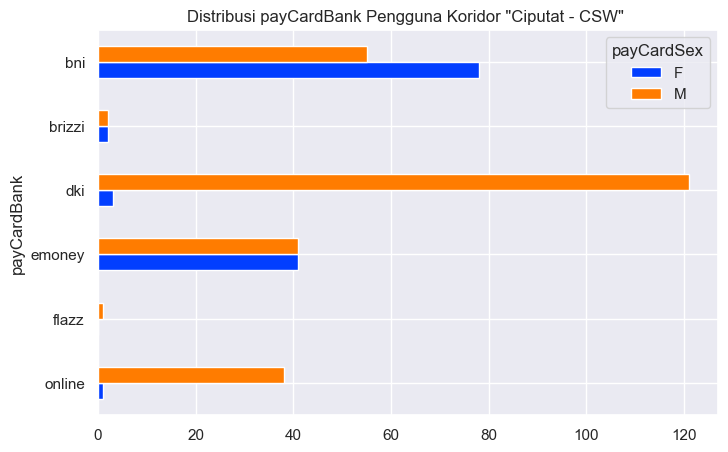

In [223]:
sns.set_palette("bright")
df_cts21.sort_values(by='payCardBank', ascending=False).drop(columns='Total').plot(kind='barh', figsize=(8,5),
title='Distribusi payCardBank Pengguna Koridor "Ciputat - CSW" ')
plt.show()

1. BNI: 
- Total pengguna: 133
- Mayoritas pengguna BNI adalah perempuan (78) dibandingkan dengan pria (55).
2. DKI:
- Total pengguna: 124
- Pada jenis kartu DKI, mayoritas pengguna adalah pria (121) dibandingkan dengan perempuan (3).
3. eMoney:
- Total pengguna: 82
- Distribusi pengguna eMoney hampir seimbang antara perempuan (41) dan pria (41).
4. Online:
- Total pengguna: 39
- Mayoritas pengguna Online adalah pria (38) dengan kontribusi perempuan yang lebih rendah (1).
5. Brizzi:
- Total pengguna: 4
- perempuan dan pria memiliki kontribusi yang hampir setara dalam penggunaan Brizzi.
6. Flazz:
- Total pengguna: 1
- Hanya satu pengguna menggunakan Flazz, dan itu adalah pria.

`Distribusi pengguna saat Weekday & Weekend berdasarkan tapIn`

In [158]:
df_weekdays21 = df_copy[df_copy['tapInDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

cross_weekdays21 = pd.crosstab(df_weekdays21['tapInDay'], df_weekdays21['tapInHour'])
cross_weekdays21

tapInHour,5,6,7,8,9,10,12,16,17,18,19,20,21
tapInDay,,,,,,,,,,,,,
Friday,3,9,5,8,10,0,1,2,6,3,9,3,14
Monday,2,8,5,11,10,0,0,2,9,5,4,7,9
Thursday,0,13,8,8,7,1,0,3,5,10,4,6,7
Tuesday,3,9,9,8,6,0,0,2,8,9,7,7,4
Wednesday,3,9,6,4,13,0,0,2,9,6,5,8,5


tapInHour
5     11
6     48
7     33
8     39
9     46
10     1
12     1
16    11
17    37
18    33
19    29
20    31
21    39
dtype: int64


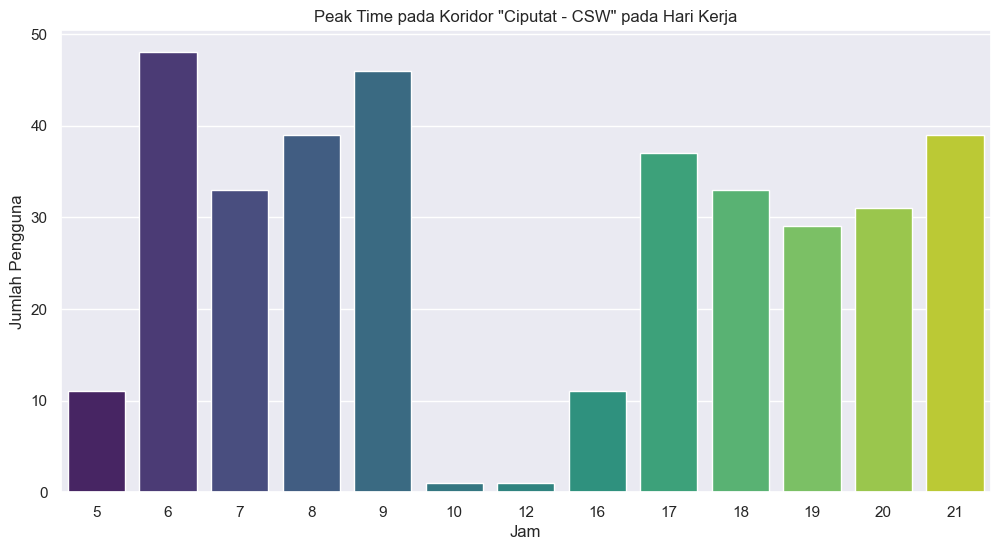

In [225]:
# Menghitung total masing-masing jam
hourly_totals = cross_weekdays21.sum(axis=0)
print(hourly_totals)

# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_totals.index, y=hourly_totals.values, palette='viridis')
plt.title('Peak Time pada Koridor "Ciputat - CSW" pada Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.show()

Dari grafik diatas, diperoleh insight sebagai berikut:

1. Pola Jam Sibuk: <br>
- Jam-jam sibuk utama pada pagi hari terjadi pada pukul 6 pagi dan 9 pagi, di mana jumlah pengguna mencapai puncaknya dengan 48 dan 46 pengguna berturut-turut. 
- Ini mengindikasikan bahwa banyak pengguna menggunakan koridor ini saat jam berangkat kerja, rute ini cukup ramai penumpang sebab menjangkau [area perkantoran](https://megapolitan.kompas.com/read/2023/02/18/01450021/rute-transjabodetabek-s21-csw-ciputat) di Pondok Indah, Ciputat dan Blok M.  
- Bus melewati tempat strategis seperti Stasiun MRT Blok M, Taman Martha Tiahahu, Kramat Pela, Pondok Indah, Lebak Bulus, Situ Gintung, UIN, Pasar Ciputat dan lainnya.

2. Kondisi Puncak Sore: <br>
Pada sore hari, terdapat dua periode dengan jumlah pengguna yang signifikan, yaitu pada pukul 17:00 dengan 37 pengguna dan pada pukul 21:00 dengan 39 pengguna. Ini mungkin terkait dengan aktivitas [pulang kerja](https://megapolitan.kompas.com/read/2023/02/18/01450021/rute-transjabodetabek-s21-csw-ciputat) atau aktivitas setelah jam kerja.

3. Penurunan Pengguna Pada Pukul 10 dan 12: <br>
Terdapat penurunan drastis pada pukul 10 pagi dan 12 siang, di mana hanya ada satu pengguna pada masing-masing waktu. Hal ini menunjukkan bahwa jam-jam ini bukan merupakan waktu puncak penggunaan koridor.

4. Keterbatasan Data pada Jam Tengah Hari: <br>
Diketahui bahwa data tidak tersedia untuk beberapa jam tengah hari (11 pagi hingga 3 sore), mungkin karena aktivitas pengguna pada rentang waktu tersebut relatif lebih rendah. `Analisis lebih lanjut pada rentang waktu ini dapat memberikan pemahaman lebih lanjut tentang tren perjalanan di tengah hari.`

5. Peluang Peningkatan Layanan: <br>
Melihat pola penggunaan, dapat dipertimbangkan untuk meningkatkan layanan atau frekuensi transportasi selama jam-jam sibuk ini guna memenuhi kebutuhan pengguna pada puncak waktu tersebut.

In [127]:
df_weekends21 = df_copy[df_copy['tapInDay'].isin(['Saturday', 'Sunday'])]

cross_weekends21 = pd.crosstab(df_weekends21['tapInDay'], df_weekends21['tapInHour'])
cross_weekends21

tapInHour,5,7,8,9,10,11,12,14,15,17,19
tapInDay,,,,,,,,,,,
Saturday,3,0,0,0,3,1,2,0,2,0,1
Sunday,2,1,2,1,1,2,0,1,1,1,0


tapInHour
5     5
7     1
8     2
9     1
10    4
11    3
12    2
14    1
15    3
17    1
19    1
dtype: int64


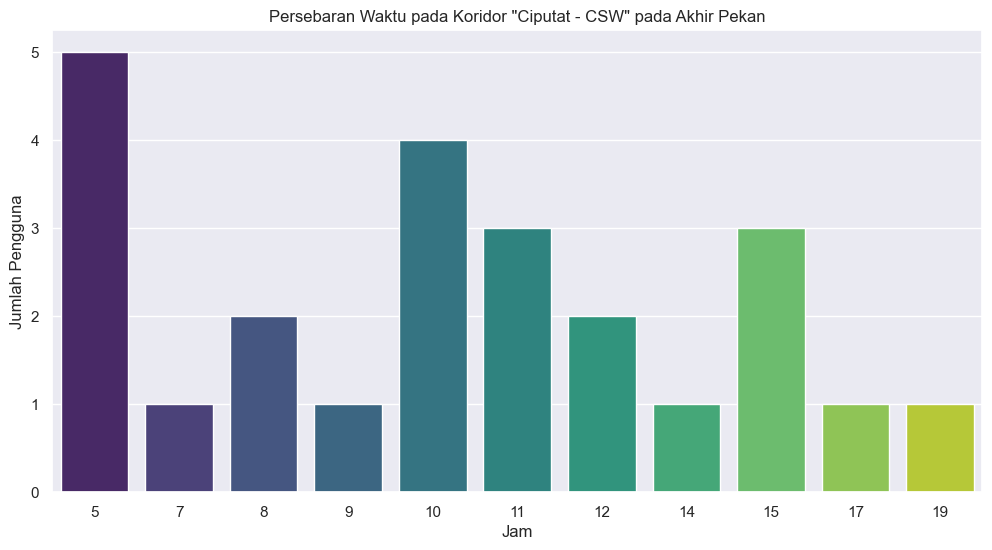

In [130]:
# Menghitung total masing-masing jam
hourly_total2 = cross_weekends21.sum(axis=0)
print(hourly_total2)
# Membuat plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_total2.index, y=hourly_total2.values, palette='viridis')
plt.title('Persebaran Waktu pada Koridor "Ciputat - CSW" pada Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.show()

Insight: 

1. Jam Sibuk Lebih Tergeser: <br>
Pada akhir pekan, terlihat bahwa jam sibuk pada pagi hari agak tergeser, dengan puncak penggunaan terjadi pada pukul 5 pagi dan 10 pagi. Namun jumlah penggunanya sangat sedikit dibanding hari kerja.

2. Penurunan Pengguna di Sore Hari: <br>
Terdapat penurunan jumlah pengguna pada jam-jam sore hari, khususnya pada pukul 17:00, dibandingkan dengan hari kerja. Hal ini mungkin menandakan bahwa pada akhir pekan, orang-orang lebih cenderung untuk beraktivitas di sore hari di luar rumah atau menghabiskan waktu dengan keluarga dan teman-teman.

3. Persebaran Lebih Merata: <br>
Terlihat bahwa persebaran pengguna pada akhir pekan lebih merata sepanjang berbagai jam dibandingkan dengan hari kerja. Ini bisa menunjukkan bahwa pada hari libur, aktivitas perjalanan dapat lebih bervariasi dan tidak terkonsentrasi pada jam-jam tertentu.

Perbedaan antara Hari kerja dan Akhir Pekan
1. Perbedaan Jumlah Pengguna:<br>
Hari Kerja menunjukkan jumlah pengguna yang lebih besar, khususnya pada jam-jam puncak pagi dan sore hari. Akhir Pekan memiliki jumlah pengguna yang lebih rendah secara keseluruhan.

2. Pola Puncak yang Berbeda:<br>
Pada Hari Kerja, puncak penggunaan terjadi pada jam-jam puncak pagi dan sore hari dengan jumlah pengguna yang signifikan. Sementara pada Akhir Pekan, puncak penggunaan lebih terfokus pada jam pagi dengan persebaran pengguna yang lebih merata sepanjang hari namun dengan jumlah yang sedikit.

3. Persebaran yang Lebih Merata pada Akhir Pekan: <br>
Akhir Pekan menunjukkan persebaran pengguna yang lebih merata sepanjang hari, sedangkan Hari Kerja memiliki puncak penggunaan yang lebih terkonsentrasi pada jam-jam tertentu.

4. Jumlah Pengguna di Sore Hari:<br>
Akhir Pekan menunjukkan penurunan jumlah pengguna di sore hari pada akhir pekan, sementara Hari Kerja memiliki jumlah pengguna yang relatif tinggi pada jam-jam ini.

`Distribusi Jumlah Pengguna pada Koridor "Ciputat - CSW" dalam bulan April`

tapInDate
02     1
03    18
04    18
05    16
06    18
07    18
08     2
09     5
10    17
11    17
12    18
13    18
14    19
15     5
16     4
17    19
18    20
19    19
20    18
21    17
22     4
23     1
24    18
25    17
26    17
27    18
28    19
29     1
30     1
dtype: int64


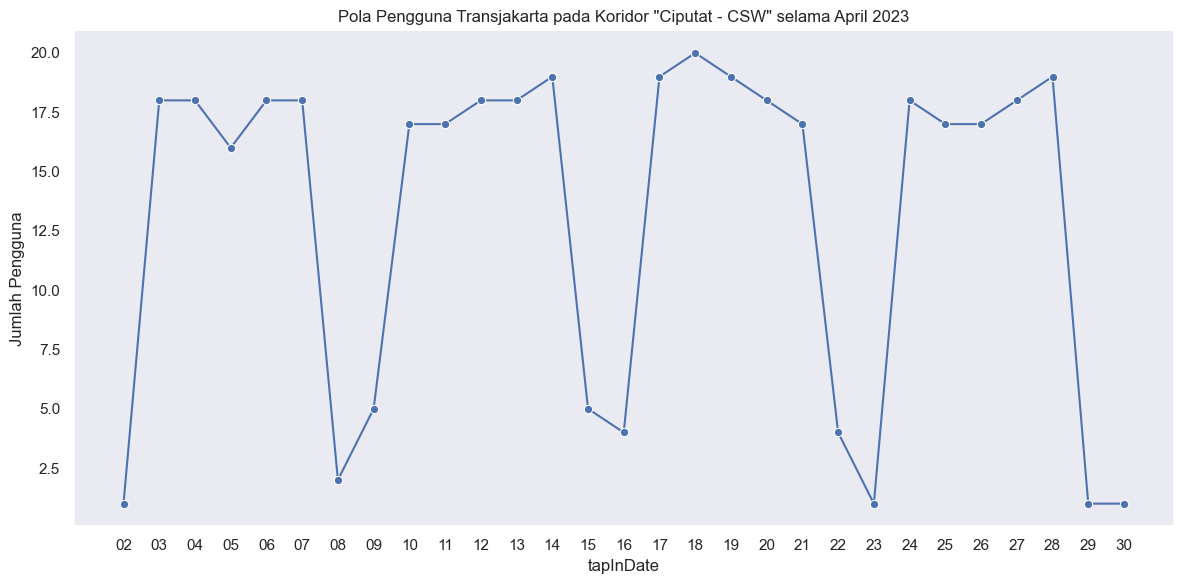

In [133]:
passenger_counts21 = df_copy.groupby('tapInDate').size()
print(passenger_counts21)

sns.set(style="darkgrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=passenger_counts21.index, y=passenger_counts21.values, marker='o')
plt.ylabel('Jumlah Pengguna')
plt.title('Pola Pengguna Transjakarta pada Koridor "Ciputat - CSW" selama April 2023')
plt.tight_layout()
plt.grid(False)

plt.show()

Insight: <br>

1. Stabilitas Penggunaan selama Hari Kerja:<br>
Sebagian besar hari kerja pada bulan April menunjukkan jumlah pengguna yang relatif stabil, berkisar antara 16 hingga 20 pengguna.

2. Penurunan Penggunaan pada Akhir Pekan:<br>
Terdapat penurunan jumlah pengguna selama akhir pekan (tanggal 8-9, 15-16, 22-23, 29-30), yang sesuai dengan pola umum penggunaan transportasi pada hari libur atau akhir pekan.

3. Pengaruh Libur Lebaran pada Tanggal 22-23:<br>
Tanggal 22-23, yang seharusnya bertepatan dengan libur Lebaran, menunjukkan bahwa penggunaan transportasi pada koridor ini tidak mengalami peningkatan yang signifikan. Ini bisa menandakan bahwa pada libur Lebaran, masyarakat cenderung mengurangi perjalanan atau menggunakan moda transportasi yang berbeda.

Kesimpulan: <br>
Berdasarkan data yang diperhatikan kembali, terlihat bahwa pola penggunaan transportasi pada Koridor "Ciputat - CSW" selama bulan April 2023 menunjukkan stabilitas pada hari kerja, penurunan pada akhir pekan, peningkatan pada tanggal-tanggal tertentu, dan pengaruh khusus pada tanggal 22-23 terkait dengan libur Lebaran. Pemahaman ini dapat membantu dalam penyesuaian jadwal layanan dan strategi pemasaran untuk merespons pola perjalanan yang berubah-ubah selama bulan April dan peristiwa khusus seperti libur Lebaran.

Penggunaan transportasi pada Koridor "Ciputat - CSW" pada tanggal 22-23 (libur Lebaran) tidak menunjukkan peningkatan yang diharapkan. Hal ini bisa disebabkan oleh kebiasaan khusus masyarakat pada libur Lebaran, di mana perjalanan mungkin dikurangi dan kegiatan lebih difokuskan di lingkungan keluarga atau kegiatan ibadah.

Setelah kita mendapatkan informasi terkait distribusi demografis pengguna koridor S21, selanjutkan kita akan coba cek kondisi Halte pada koridor S21. Analisa kita lanjutkan hanya pengecekan pada saat hari kerja, data akhir pekan tidak digunakan berkaitan dengan datanya yang sangat sedikit. Direkomendasikan untuk ditiadakan demi menekan biaya operasional.

> Kondisi HalteTapIn dan TapOut pada saat Morning Peak Hour VS Evening Peak Hour 
### Kondisi Halte Tap In dan Tap Out pada saat Morning Peak Hour 

Sebelum melanjutkan analisis, kita akan membuat function terlebih dahulu untuk menentukan peak hour saat hari kerja untuk Koridor Ciputat - CSW. Hal ini dilakukan, sebab peak hour untuk koridor ini berbeda dengan Peak Hour Koridor secara keseluruhan.


#### `TapIn`

        tapInStopsName  Count
14              Yado I     24
4    Jln. Wr Supratman     21
0                ASEAN     20
11      Pondok Indah 1     20
3    Jln. Pesanggrahan     19
5      Kejaksaan Agung     19
6          Lebak Bulus     19
12      Pondok Indah 2     19
7   Metro Pondok Indah     18
1           Antena III      1
2        Jln. H. Ahmad      1
8     Polsek Ciputat 1      1
9     Polsek Ciputat 2      1
10  Pom Bensin Ciputat      1
13      Situ Gintung 1      1
15            Yado III      1


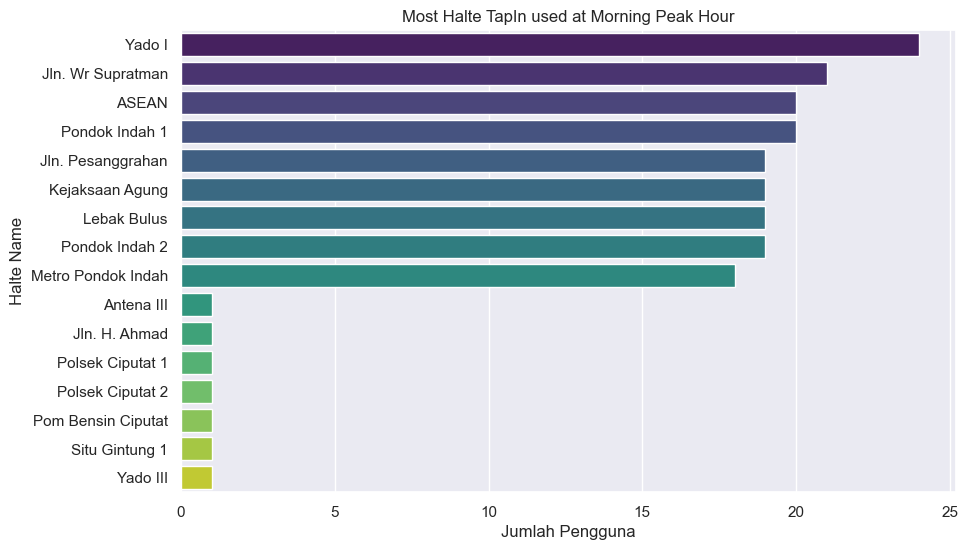

In [164]:
dfs21_morning = df_copy[(df_copy['peak_hourwd'] == "Morning Peak Hour") & (df_copy['corridorID'] == 'S21')]
dfs21_halte_morning = dfs21_morning.groupby(['tapInStopsName']).size().reset_index(name='Count')
dfs21_halte_morning = dfs21_halte_morning.sort_values(by='Count', ascending=False)

print(dfs21_halte_morning)
plt.figure(figsize=(10, 6))
sns.barplot(data=dfs21_halte_morning, y='tapInStopsName', x='Count', order=dfs21_halte_morning['tapInStopsName'].value_counts().index, palette='viridis')
plt.title('Most Halte TapIn used at Morning Peak Hour')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Halte Name')
plt.show()

Insight TapIn Morning Peak Hour: <br>
1. Halte dengan Jumlah Pengguna Tertinggi: <br>
Halte "Yado I" memiliki jumlah pengguna tertinggi dengan 24 pengguna, diikuti oleh "Jln. Wr Supratman" dan "ASEAN" masing-masing dengan 21 dan 20 pengguna.
2. Penggunaan yang Tinggi di Pondok Indah: <br>
Halte di sekitar wilayah Pondok Indah (Pondok Indah 1 dan Pondok Indah 2) juga memiliki jumlah pengguna yang cukup tinggi, masing-masing 20 dan 19 pengguna.
3. Penggunaan yang Rendah di Beberapa Halte:<br>
Sejumlah halte, seperti "Antena III," "Jln. H. Ahmad," "Polsek Ciputat 1," "Polsek Ciputat 2," "Pom Bensin Ciputat," "Situ Gintung 1," "Yado III," memiliki jumlah pengguna hanya 1. Ini bisa menunjukkan bahwa halte-halte tersebut mungkin kurang diminati atau terletak di daerah dengan mobilitas rendah.
4. Varian Jumlah Pengguna yang Signifikan: <br>
Terdapat variasi yang signifikan dalam jumlah pengguna antar halte, yang dapat dipengaruhi oleh lokasi geografis, aksesibilitas, dan kepentingan tujuan perjalanan di setiap area.
5. Pentingnya Lokasi dan Keterkaitan dengan Rute: <br>
Halte yang berada di lokasi strategis atau memiliki keterkaitan dengan rute transportasi lainnya cenderung memiliki jumlah pengguna yang lebih tinggi. Sebaliknya, halte-halte yang terpencil atau memiliki keterkaitan yang kurang mungkin memiliki jumlah pengguna yang lebih rendah.

Kesimpulan:

Data ini memberikan gambaran tentang persebaran jumlah pengguna pada saat TapIn di setiap halte. Analisis harapannya dapat membantu untuk memahami preferensi dan kebutuhan pengguna di berbagai lokasi, sehingga dapat dilakukan optimalisasi layanan untuk meningkatkan efisiensi dan kenyamanan perjalanan.

#### `TapOut`

       tapOutStopsName  Count
6      Kejaksaan Agung     40
0            Antena II     37
1            Auto 2000     21
3        Jln. Pahlawan     20
2        Jln. H. Ahmad     19
11       Pondok Pinang     19
13      Situ Gintung 2     19
8            LPP RRI 1      5
4     Jln. Sandratex 1      1
5         Kampus Uin 2      1
7          Komplek Uin      1
9   Pom Bensin Ciputat      1
10      Pondok Indah 2      1
12    Pool PPD Ciputat      1


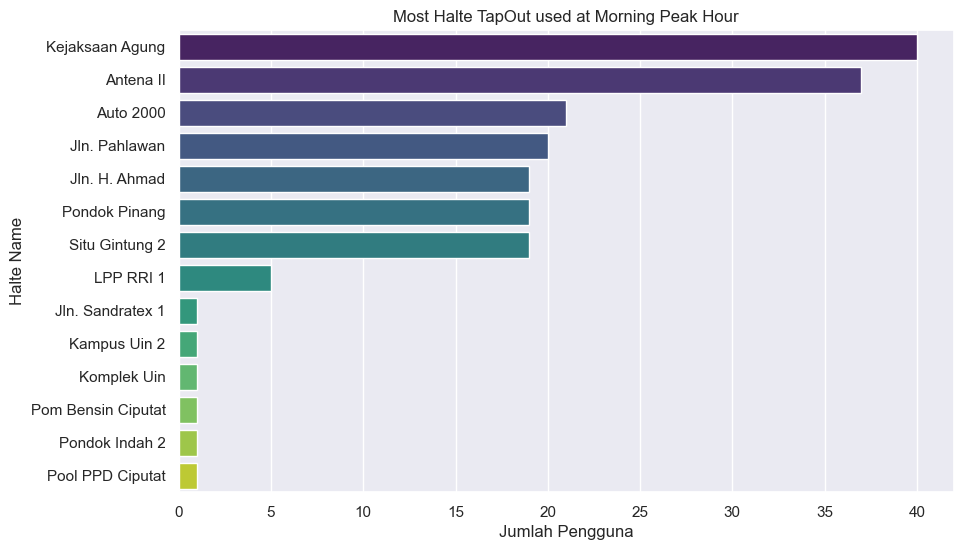

In [151]:
dfs21_morning2 = df_copy[(df_copy['peak_hourwd'] == "Morning Peak Hour") & (df_copy['corridorID'] == 'S21')]
dfs21_halte_morning2 = dfs21_morning2.groupby(['tapOutStopsName']).size().reset_index(name='Count')
dfs21_halte_morning2 = dfs21_halte_morning2.sort_values(by='Count', ascending=False)

print(dfs21_halte_morning2)

plt.figure(figsize=(10, 6))
sns.barplot(data=dfs21_halte_morning2, y='tapOutStopsName', x='Count', order=dfs21_halte_morning2['tapOutStopsName'].value_counts().index, palette='viridis')
plt.title('Most Halte TapOut used at Morning Peak Hour')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Halte Name')
plt.show()

Insight TapOut Morning Peak Hour: <br>
1. Halte dengan Jumlah Pengguna Tertinggi:<br>
Halte "Kejaksaan Agung" menjadi halte dengan jumlah pengguna tertinggi pada saat TapOut, mencapai 40 pengguna. "Antena II" juga memiliki jumlah pengguna yang signifikan, yaitu 37 pengguna.
2. Penggunaan yang Tinggi di Beberapa Halte:<br>
Beberapa halte lain dengan jumlah pengguna yang cukup tinggi meliputi "Auto 2000" (21 pengguna), "Jln. Pahlawan" (20 pengguna), "Jln. H. Ahmad" (19 pengguna), "Pondok Pinang" (19 pengguna), dan "Situ Gintung 2" (19 pengguna).
3. Halte dengan Jumlah Pengguna Rendah:<br>
Sejumlah halte hanya memiliki sedikit pengguna pada saat TapOut, dengan jumlah pengguna sebanyak 1 di beberapa halte seperti "LPP RRI 1," "Jln. Sandratex 1," "Kampus Uin 2," "Komplek Uin," "Pom Bensin Ciputat," "Pondok Indah 2," dan "Pool PPD Ciputat."
4. Perbedaan Jumlah Pengguna TapOut dan TapIn:<br>
Beberapa halte memiliki perbedaan yang signifikan antara jumlah pengguna saat TapOut dan TapIn. Misalnya, "Antena II" memiliki 37 pengguna saat TapOut dan 1 pengguna saat TapIn, menunjukkan perpindahan besar di halte tersebut.
5. Pentingnya Halte Kejaksaan Agung:<br>
Halte "Kejaksaan Agung" tampaknya menjadi titik penting dengan jumlah pengguna yang tinggi pada saat TapOut. Ini bisa disebabkan oleh lokasinya yang strategis atau karena keberadaan pusat aktivitas di sekitarnya.

Kesimpulan:<br>

Data ini memberikan wawasan mengenai persebaran jumlah pengguna pada saat TapOut di setiap halte. Analisis ini diharapkan dapat membantu  dalam merencanakan strategi layanan, mengoptimalkan rute, dan memahami preferensi perjalanan pengguna di berbagai lokasi. Perbedaan antara jumlah pengguna saat TapOut dan TapIn dapat menunjukkan perpindahan perjalanan di antara halte-halte tertentu yang perlu dipahami lebih lanjut untuk meningkatkan efisiensi layanan.

### Evening Peak Hour

`TapIn`

        tapInStopsName  Count
0     Jln. KRI Harimau     26
2          Margaguna 1     20
4          Ps. Ciputat     20
5  Pusdiklat Kemenag 1     20
6  Pusdiklat Kemenag 2     20
1          Kramat Pela     19
3          Margaguna 2     19
8       Situ Gintung 2     19
7       Situ Gintung 1     18
9               Yado I      1


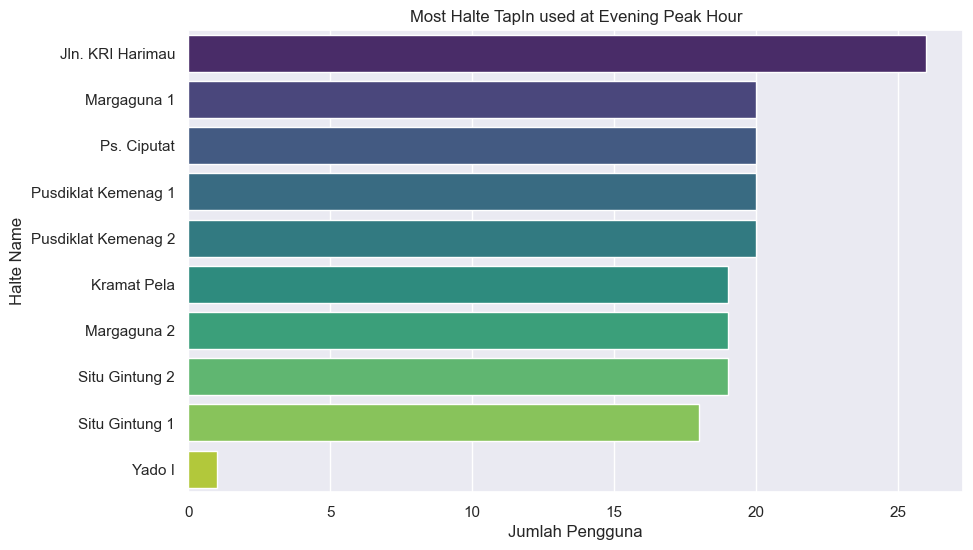

In [156]:
dfs21_evening = df_copy[(df_copy['peak_hourwd'] == "Evening Peak Hour") & (df_copy['corridorID'] == 'S21')]
dfs21_halte_evening = dfs21_evening.groupby(['tapInStopsName']).size().reset_index(name='Count')
dfs21_halte_evening = dfs21_halte_evening.sort_values(by='Count', ascending=False)

print(dfs21_halte_evening)

plt.figure(figsize=(10, 6))
sns.barplot(data=dfs21_halte_evening, y='tapInStopsName', x='Count', order=dfs21_halte_evening['tapInStopsName'].value_counts().index, palette='viridis')
plt.title('Most Halte TapIn used at Evening Peak Hour')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Halte Name')
plt.show()

Insight:

1. Halte dengan Jumlah Pengguna Tertinggi pada Evening Peak Hour:<br>
Halte "Jln. KRI Harimau" menjadi halte dengan jumlah pengguna tertinggi pada saat TapIn selama Evening Peak Hour, mencapai 26 pengguna. Halte "Margaguna 1," "Ps. Ciputat," "Pusdiklat Kemenag 1," dan "Pusdiklat Kemenag 2" juga memiliki jumlah pengguna yang signifikan, masing-masing sebanyak 20 pengguna.
2. Variasi Jumlah Pengguna pada Halte Lainnya:<br>
Halte-halte seperti "Kramat Pela," "Margaguna 2," "Situ Gintung 2," dan "Situ Gintung 1" memiliki jumlah pengguna yang bervariasi antara 18 hingga 19 pengguna.
3. Halte dengan Jumlah Pengguna Rendah pada Evening Peak Hour:<br>
Halte "Yado I" memiliki jumlah pengguna yang rendah pada saat Evening Peak Hour, hanya 1 pengguna. Hal ini mungkin disebabkan oleh keberadaan atau karakteristik lingkungan sekitar halte tersebut.
4. Perbedaan dengan Data TapIn saat Morning Peak Hour:<br>
Terdapat variasi dalam halte yang memiliki jumlah pengguna tinggi antara data TapIn Morning Peak Hour dan data TapIn pada Evening Peak Hour. Ini menunjukkan  preferensi dan pola perjalanan pengguna yang berbeda pada waktu-waktu tertentu.

Kesimpulan: <br>

Data ini memberikan gambaran mengenai persebaran jumlah pengguna pada saat TapIn di setiap halte selama Evening Peak Hour. Analisis ini diharapkan dapat membantu dalam menyesuaikan strategi layanan pada jam-jam sibuk dan memahami preferensi perjalanan pengguna pada waktu-waktu khusus. Perbedaan antara data TapIn umum dan data TapIn pada Evening Peak Hour menunjukkan pentingnya memahami pola perjalanan yang dapat bervariasi selama berbagai waktu dalam sehari.

`TapOut`

                   tapOutStopsName  Count
6               Pom Bensin Ciputat     38
0                          Dwijaya     20
2  Komplek Mandiri Giant Express 1     20
4                      Margaguna 2     20
8                      Ps. Ciputat     20
3                        LPP RRI 2     19
5                 Polsek Ciputat 2     19
7                 Pool PPD Ciputat     19
9                            UMJ 2      6
1                    Hotel Melawai      1


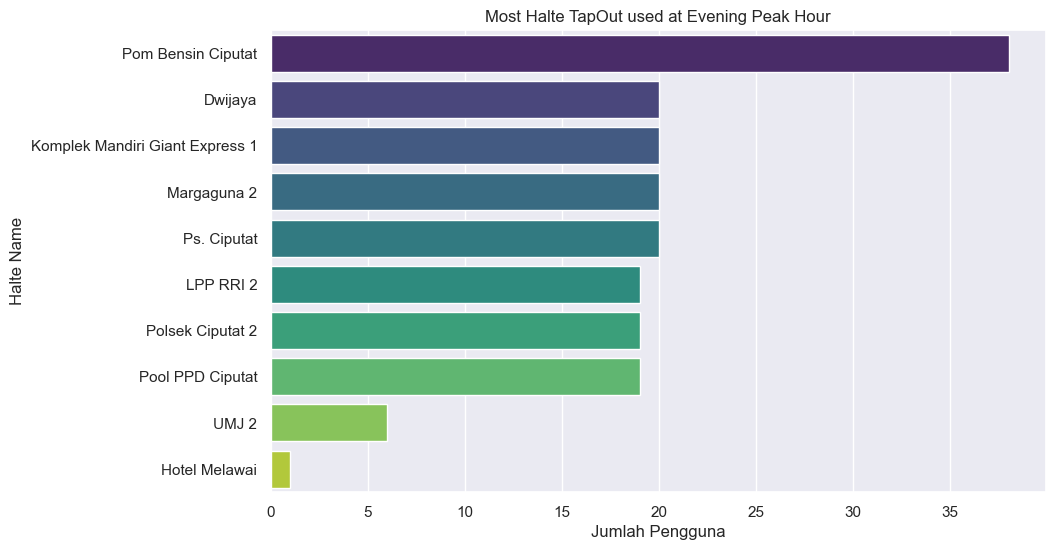

In [167]:
dfs21_evening2 = df_copy[(df_copy['peak_hourwd'] == "Evening Peak Hour") & (df_copy['corridorID'] == 'S21')]
dfs21_halte_evening2 = dfs21_evening2.groupby(['tapOutStopsName']).size().reset_index(name='Count')
dfs21_halte_evening2 = dfs21_halte_evening2.sort_values(by='Count', ascending=False)

print(dfs21_halte_evening2)

plt.figure(figsize=(10, 6))
sns.barplot(data=dfs21_halte_evening2, y='tapOutStopsName', x='Count', order=dfs21_halte_evening2['tapOutStopsName'].value_counts().index, palette='viridis')
plt.title('Most Halte TapOut used at Evening Peak Hour')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Halte Name')
plt.show()

Insight

1. Halte dengan Jumlah Pengguna Tertinggi pada Evening Peak Hour: <br>
   Halte "Pom Bensin Ciputat" menjadi halte dengan jumlah pengguna tertinggi pada saat TapOut selama Evening Peak Hour, mencapai 38 pengguna. Halte "Dwijaya," "Komplek Mandiri Giant Express 1," "Margaguna 2," dan "Ps. Ciputat" juga memiliki jumlah pengguna yang signifikan, masing-masing sebanyak 20 pengguna.

2. Variasi Jumlah Pengguna pada Halte Lainnya: <br>
   Halte-halte seperti "LPP RRI 2," "Polsek Ciputat 2," "Pool PPD Ciputat," dan "UMJ 2" memiliki jumlah pengguna yang bervariasi antara 19 hingga 6 pengguna.

3. Halte dengan Jumlah Pengguna Rendah pada Evening Peak Hour: <br>
   Halte "Hotel Melawai" memiliki jumlah pengguna yang rendah pada saat Evening Peak Hour, hanya 1 pengguna. Hal ini mungkin disebabkan oleh keberadaan atau karakteristik lingkungan sekitar halte tersebut.

4. Perbedaan dengan Data TapOut Umum: <br>
   Terdapat variasi dalam halte yang memiliki jumlah pengguna tinggi antara data TapOut umum dan data TapOut pada Evening Peak Hour. Ini menunjukkan bahwa preferensi dan pola perjalanan pengguna dapat berbeda pada waktu-waktu tertentu, seperti Evening Peak Hour.

**Kesimpulan:**

Data ini memberikan gambaran mengenai persebaran jumlah pengguna pada saat TapOut di setiap halte selama Evening Peak Hour. Analisis ini diharapkan dapat membantu dalam menyesuaikan strategi layanan pada jam-jam sibuk dan memahami preferensi perjalanan pengguna pada waktu-waktu khusus. Perbedaan antara data TapOut Morning Peak Hour dan data TapOut pada Evening Peak Hour menunjukkan pentingnya memahami pola perjalanan yang dapat bervariasi selama berbagai waktu dalam sehari.

`Distribusi berdasarkan arah Keberangkatan dan Kepulangan`

direction
Back    180
Go      179
Name: count, dtype: int64


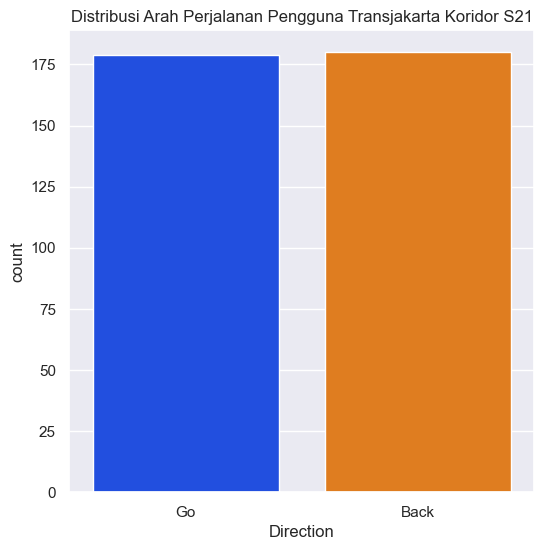

In [226]:
# Filter DataFrame based on specified directions
df_directions21 = df_copy[df_copy['tapInDay'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Use df_directions21 instead of df_copy for value counts
df_directions21_count = df_directions21['direction'].value_counts()
print(df_directions21_count)

# Use df_directions21_count instead of df_copy_direction for plotting
plt.figure(figsize=(6, 6))
sns.countplot(data=df_directions21, x='direction', palette='bright')
plt.title('Distribusi Arah Perjalanan Pengguna Transjakarta Koridor S21')
plt.xlabel('Direction')
plt.show()

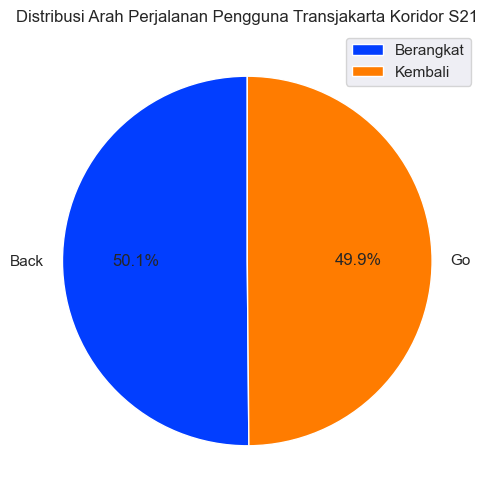

In [227]:
plt.figure(figsize=(6, 6))
df_directions21_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright', len(df_directions21_count)))
plt.title('Distribusi Arah Perjalanan Pengguna Transjakarta Koridor S21')
plt.legend(['Berangkat', 'Kembali'], loc=0)
plt.ylabel('')
plt.show()

Insight: <br>

1. Distribusi Jumlah Pengguna berdasarkan Arah Perjalanan: <br>
   Terdapat distribusi yang cukup seimbang antara pengguna yang memilih untuk `Kembali` ("Back") dan yang memilih untuk `Pergi` ("Go").Terdapat penambahan 0.1 % pengguna untuk arah perjalanan Kembali.

2. Implikasi Distribusi Seimbang: <br>
   Distribusi yang seimbang antara pengguna yang kembali dan yang pergi dapat memiliki implikasi beragam. Ini mungkin menunjukkan adanya kebutuhan transportasi dua arah yang cukup signifikan di koridor tersebut.

3. Perluasan Layanan untuk Kebutuhan Perjalanan Kembali: <br>
   Jika pengguna yang kembali memiliki kecenderungan menggunakan layanan transportasi ini, mungkin perlu dipertimbangkan perluasan atau peningkatan kapasitas layanan pada arah tersebut untuk mengakomodasi kebutuhan perjalanan.

**Kesimpulan: <br>

Distribusi yang seimbang antara pengguna yang memilih untuk kembali dan melanjutkan menunjukkan kompleksitas dalam preferensi perjalanan di koridor tersebut. Diperlukan pemahaman lebih lanjut mengenai alasan di balik pilihan pengguna, ini dapat membantu dalam merancang strategi layanan yang lebih efektif dan responsif terhadap kebutuhan pengguna.

# Kesimpulan dan Rekomendasi 

**Kesimpulan**

Dari analisa yang telah kita lakukan pada Koridor Ciputat - CSW (S21), dapat ditarik beberapa kesimpulan

1. Jumlah Pengguna Koridor: <br>
   Koridor Cibubur - Balai Kota memiliki 190 pengguna, sementara Koridor Ciputat - CSW memiliki 180 pengguna. Pemilihan untuk menganalisis Koridor Ciputat - CSW didasarkan pada **`CARI TAU DULU.`**

2. Distribusi Pengguna Koridor S21 berdasarkan Gender: <br>
   Mayoritas pengguna (67.36%) adalah pria, sementara wanita menyumbang 32.64%.

3. Distribusi Pengguna Koridor S21 berdasarkan Kategori Usia: <br>
   Mayoritas pengguna (80.2%) termasuk dalam kategori dewasa, sedangkan remaja menyumbang 19.8%. Tidak ada data untuk bayi dan balita, anak-anak, maupun lansia.

4. Distribusi Pengguna Metode Pembayaran berdasarkan Gender: <br>
   - Metode pembayaran "bni" dan "dki" lebih populer secara jumlah.
   - Menariknya jika dikategorikan berdasarkan Gender, pria lebih dominan dibanding perempuan. dengan pengguna pria sebanyak 121 dan perempuan hanya 3 orang. 
   - Begitu juga untuk pembayaran online menggunakan Aplikasi JAKI, hanya terdapat 1 perempuan  dari 39 total pengguna pembayaran via online.
   - Penggunaan metode pembayaran brizzi dan flazz juga kurang diminati pada koridor S21.

5. Peak Time pada Koridor "Ciputat - CSW" pada Hari Kerja:<br>
   - Pagi hari, puncak penggunaan terjadi pada jam 6 pagi dan 9 pagi, menunjukkan penggunaan koridor saat menuju [tempat kerja](https://megapolitan.kompas.com/read/2023/02/18/01450021/rute-transjabodetabek-s21-csw-ciputat), sekolah, dan kampus.
   - Sore hari, puncak penggunaan terjadi pada 17:00 dan 21:00, kemungkinan terkait dengan pulang kerja atau [aktivitas setelah jam kerja](https://megapolitan.kompas.com/read/2023/02/18/01450021/rute-transjabodetabek-s21-csw-ciputat).
   - Pola penggunaan menunjukkan peluang peningkatan layanan atau frekuensi transportasi pada jam-jam sibuk untuk memenuhi kebutuhan pengguna pada puncak waktu tersebut.

6. Persebaran Waktu pada Koridor "Ciputat - CSW" pada Akhir Pekan: <br>
   Terlihat adanya perbedaan dalam persebaran pengguna pada akhir pekan dibandingkan dengan hari kerja.

7. Pola Penggunaan Transjakarta pada Koridor "Ciputat - CSW" selama April 2023: <br>
   - Pola penggunaan transportasi stabil selama hari kerja dengan penurunan pada akhir pekan. 
   - Tidak terjadi peningkatan pengguna saat libur lebaran bahkan pada tanggal 23 menunjukan bahwa masyarakat cenderung mengurangi perjalanan saat libur lebaran.
8. Persebaran Jumlah Pengguna pada saat TapIn di setiap Halte:<br>
   Terdapat variasi signifikan dalam jumlah pengguna pada saat TapIn di setiap halte pada waktu Morning Peak Hour. Lokasi strategis, keterkaitan dengan rute, dan karakteristik lingkungan mempengaruhi jumlah pengguna.

9. Persebaran Jumlah Pengguna pada saat TapOut di setiap Halte pada waktu Evening Peak Hour:<br>
   Halte "Pom Bensin Ciputat" memiliki jumlah pengguna tertinggi saat TapOut selama Evening Peak Hour. Variasi jumlah pengguna terjadi di berbagai halte.

10. Distribusi Arah Perjalanan Pengguna: <br>
   Terdapat distribusi yang seimbang antara pengguna yang melakukan perjalanan keberangkatan dan kembali. Implikasinya perlu dianalisis lebih lanjut untuk memahami preferensi dan kebutuhan pengguna.

**Rekomendasi**

1. Mengurangi Penumpukan pada Peak Hour: <br>
    Peningkatan frekuensi layanan pada jam-jam sibuk, khususnya pada pukul 6 pagi, 9 pagi, 17:00, dan 21:00, dapat membantu mengurangi penumpukan. Penerapan sistem pengaturan antrean di halte strategis juga dapat meningkatkan efisiensi pemberhentian.
2. Meniadakan Armada pada Waktu Akhir Pekan:
    Dengan mengetahui bahwa jumlah pengguna pada akhir pekan sangat rendah (paling banyak 5 pengguna), pertimbangkan untuk meniadakan operasional armada pada akhir pekan atau mengurangi jumlah perjalanan armada yang beroperasi. Ini dapat membantu menekan biaya operasional tanpa mengorbankan kualitas layanan. 
3. Strategi Peningkatan Profit melalui Aplikasi JAKI: <br>
    Mendorong penggunaan aplikasi JAKI dengan memberikan promosi, atau penawaran khusus bagi pengguna yang memilih pembayaran online melalui aplikasi. Bisa dengan mengadopsi sistem poin yang diterapkan oleh Alfamart dimana setiap melakukan transaksi sebanyak n-kali,mendapatkan free biaya perjalanan. Kampanye pemasaran yang cermat dapat meningkatkan kepercayaan dan popularitas aplikasi.
4. Kolaborasi dengan Bank: <br>
    Mengidentifikasi dan berkolaborasi dengan bank yang memiliki ketertarikan rendah pada koridor S21. Potensi kemitraan dapat mencakup program promosi bersama, penawaran diskon bagi pemegang kartu bank tertentu, atau pengembangan fitur khusus untuk pengguna dengan metode pembayaran tertentu.
5. Optimasi Layanan di Jam Tengah Hari: <br>
    Melakukan optimasi untuk perjalanan di jam 10 dan 12, karna hanya terdapat sedikit penumpang pada jam tersebut. Hal ini dapat diinfokan melalui aplikasi JAKI agar pengguna yang memerlukan armada untuk perjalanan dapat melakukan pengecekan terlebih dahulu sehingga masih mendapatkan kendaraan guna untuk memenuhi kebutuhan perjalanan mereka.

Link Tableau: [click here](https://public.tableau.com/app/profile/teguh.saputra4922/viz/Transjakarta_17050260690670/Dashboard1)

Teguh Saputra | JC Data Science Online - 12 (C)